<center> Materia: Aprendizaje profundo para percepción y control </center>
<center> Laboratorio: Detección de Objetos con YOLOv5 </center>
<center> Jesús Eduardo Sanchez Daza </center>
<center> Maestria en Inteligencia Artificial Aplicada al Sector Energetico </center>

**1. Definición del problema:** 
Con este desarrollo, se plantea resolver el problema de la detección de aerogeneradores en una variedad de ambientes y ecosistemas, ademas de ser un problema consistente con la tematica del master, este tipo de problemas puede tener los siguientes beneficios:

*   **Monitoreo de parques eólicos:** Al utilizar un modelo de detección de imágenes para monitorear parques eólicos, se puede identificar rápidamente cualquier problema con los aerogeneradores y programar el mantenimiento de manera oportuna, lo que a su vez aumentará la eficiencia y reducirá los costos de mantenimiento.

*   **Análisis ambiental:** La detección de aerogeneradores puede permitir la recopilación de datos precisos sobre la ubicación y el número de turbinas en un área determinada. Esta información puede ser útil para evaluar el correcto espaciado entre ellos, entre otros.

*   **Detección de objetos externos:** Con este planteamiento podemos detectar en tiempo real objetos distintos a aerogeneradores (tales como personas, aves, autos, etc.) que pueden afectar su rendimiento

**2. Creación / Obtencion del Dataset**

En este caso, se utilizó el dataset *Object Detection Dataset - Wind Turbines*, obtenido de Kaggle [Dataset](https://www.kaggle.com/datasets/kylegraupe/wind-turbine-image-dataset-for-computer-vision?resource=download), para este dataset se hizo el correspondiente tratamiento para trabajar con el modelo YOLO, dejando los datos de la siguiente manera:

- data/images/train: imagenes para entrenar el modelo
- data/images/val: imagenes para validar el modelo
- data/label/train: anotaciones en las imagenes de entrenamiento
- data/label/val: anotaciones en las imagenes de validacion

Para este caso, se utilizaron 50 imagenes para entrenamiento, otras 50 para validar y se utilizarán 10 imagenes para hacer inferencias y testeos al modelo

Y subimos de forma manual el archivo .zip de estos datos, este archivo tendra el nombre de *data.zip*

**3. Entrenamiento del modelo**

In [ ]:
# Descomprimos los datos, descomprimimos el archivo "data.zip" que se encuentra en la carpeta "/content" y extraemos su contenido en la carpeta padre (../).
# El parámetro "-q" significa "modo silencioso", lo que significa que no se mostrarán mensajes de salida en la consola. El siguiente parámetro "/content/data.zip" es la ubicación del archivo zip que se va a extraer, 
# el parámetro "-d" se utiliza para especificar el directorio de destino donde se va a extraer el contenido. 
# En este caso, el contenido del archivo zip se extraerá en el directorio padre (../) de la carpeta actual.
!unzip -q /content/data.zip -d ../

replace ../data/images/train/windmill97_jpg.rf.53900b6cf9e3c782a4c02c58a3436be2.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: A


In [ ]:
# Clonamos su repositorio de Github e instalamos todas las dependencias
!git clone https://github.com/ultralytics/yolov5 
%cd yolov5
%pip install -qr requirements.txt 

import torch
import utils
display = utils.notebook_init()

YOLOv5 🚀 v7.0-147-gaa7c45c Python-3.9.16 torch-2.0.0+cu118 CPU


Setup complete ✅ (2 CPUs, 12.7 GB RAM, 23.3/107.7 GB disk)


Para iniciar con el entrenamiento, lo hacemos con las siguientes lineas: 

 - La primera línea *!git clone https://github.com/ultralytics/yolov5* clona el repositorio de YOLOv5 desde GitHub en el entorno de Google Colab.

- La segunda línea *%cd yolov5* cambia el directorio de trabajo actual al directorio de YOLOv5, lo que significa que todos los comandos a partir de este punto se ejecutarán en el directorio YOLOv5.

- La tercera línea *%pip install -qr requirements.txt* instala todas las dependencias necesarias para ejecutar el código de YOLOv5. El archivo requirements.txt contiene una lista de todas las dependencias requeridas por YOLOv5. La opción "-q" se utiliza para suprimir la salida detallada de la instalación.

- La cuarta línea *import torch* importa la biblioteca PyTorch, que es la biblioteca de aprendizaje profundo utilizada por YOLOv5.

- La quinta línea *import utils* importa un módulo llamado utils, que contiene una variedad de funciones útiles que se utilizan a lo largo del código de YOLOv5.

- La sexta línea *display = utils.notebook_init()* inicializa la visualización de los resultados de YOLOv5 en el entorno de notebook de Google Colab. Esta función se utiliza para mostrar la salida de detección de objetos en tiempo real en el cuaderno de Google Colab.

Usando como base el archivo coco128.yaml creamos los parametros para entrenar el modelo, esto lo podemos hacer escrbiendo lo siguiente en un archivo nuevo .yaml

*path: /content/data  # dirrecion o path base*

*train: /content/data/images/train/*  # imagenes de entrenamiento

*val: /content/data/images/val/*  # imagenes de validacion

*test:*  # imagenes para testear (opcional)

*nc: 1*  # numero de clases

*names: ['aerogenerator']*  # nombre de la clase*

Con estas lineas, primero indicamos la ruta donde estan las imagenes y las etiquetas para el re-entrenamiento del modelo y definimos las distintas clases que tendrá nuestro problema

Y lo subimos de forma manual en la misma ruta, este archivo tiene el nombre de *new_model.yaml*

Con la siguiente linea se ejecutará el re entrenamiento del modelo, dicha linea tendrá las siguientes caracteristicas:

- **train.py:** es el archivo que contiene el código de entrenamiento del modelo YOLOv5.

- **img 640:** indica el tamaño de la imagen de entrada que se utilizará durante el entrenamiento.

- **batch 16:** establece el tamaño del lote (batch size) que se utilizará durante el entrenamiento. En este caso, se utilizarán 16 imágenes por lote.

- **epochs 50:** establece el número de épocas (epochs) que se utilizarán para entrenar el modelo. En este caso, se entrenará el modelo durante 50 épocas.

- **data /content/yolov5/data/new_model.yaml:** indica la ruta al archivo YAML que contiene la configuración del modelo que se va a entrenar. En este caso, se utiliza el archivo new_model.yaml, que se encuentra en la carpeta /content/yolov5/data.

- **weights yolov5s.pt:** establece los pesos (weights) iniciales que se utilizarán para entrenar el modelo. En este caso, se utiliza el archivo yolov5s.pt, que contiene los pesos de un modelo pre-entrenado.

- **cache:** indica que se va a utilizar el caché durante el entrenamiento para acelerar el proceso de carga de datos.

In [ ]:
!python train.py --img 640 --batch 16 --epochs 50 --data /content/yolov5/data/new_model.yaml --weights yolov5s.pt --cache

train: weights=yolov5s.pt, cfg=, data=/content/yolov5/data/new_model.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=50, batch_size=16, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
requirements: /content/requirements.txt not found, check failed.
YOLOv5 🚀 v7.0-147-gaa7c45c Python-3.9.16 torch-2.0.0+cu118 CPU

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, 

Del proceso de entrenamiento del modelo podemos inferir lo siguiente: 

- El modelo utilizado es YOLOv5 versión 7.0-147-gaa7c45c, que utiliza Python 3.9.16 y PyTorch 2.0.0+cu118. También se muestra una descripción detallada de la arquitectura del modelo, que consta de varias capas convolucionales y capas de concatenación.

- El modelo base o el modelo pre-definido al cual se le va a hacer el re entrenamiento consta de 214 capas en total, que representan 7022326 parametros en total y tiene una combinación de redes convolucionales con distintas cantidades de filtros mayoritariamente 3*3, con stride de 2 y pueden o no tener padding

- Tambien podemos encontrar una serie de bloques C3 (convolución en cascada) que normalmente se usan para mezclar y reducir las características.

- Por ultimo, podemos darnos cuenta que el modelo final para este caso en especifico cuenta con 157 capas, lo que constituye 7012822 parametros.


**4. Informe de resultados del modelo:** 
Para este apartado se describirá como es el proceso de fine-tunning o re entrenamiento del modelo

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


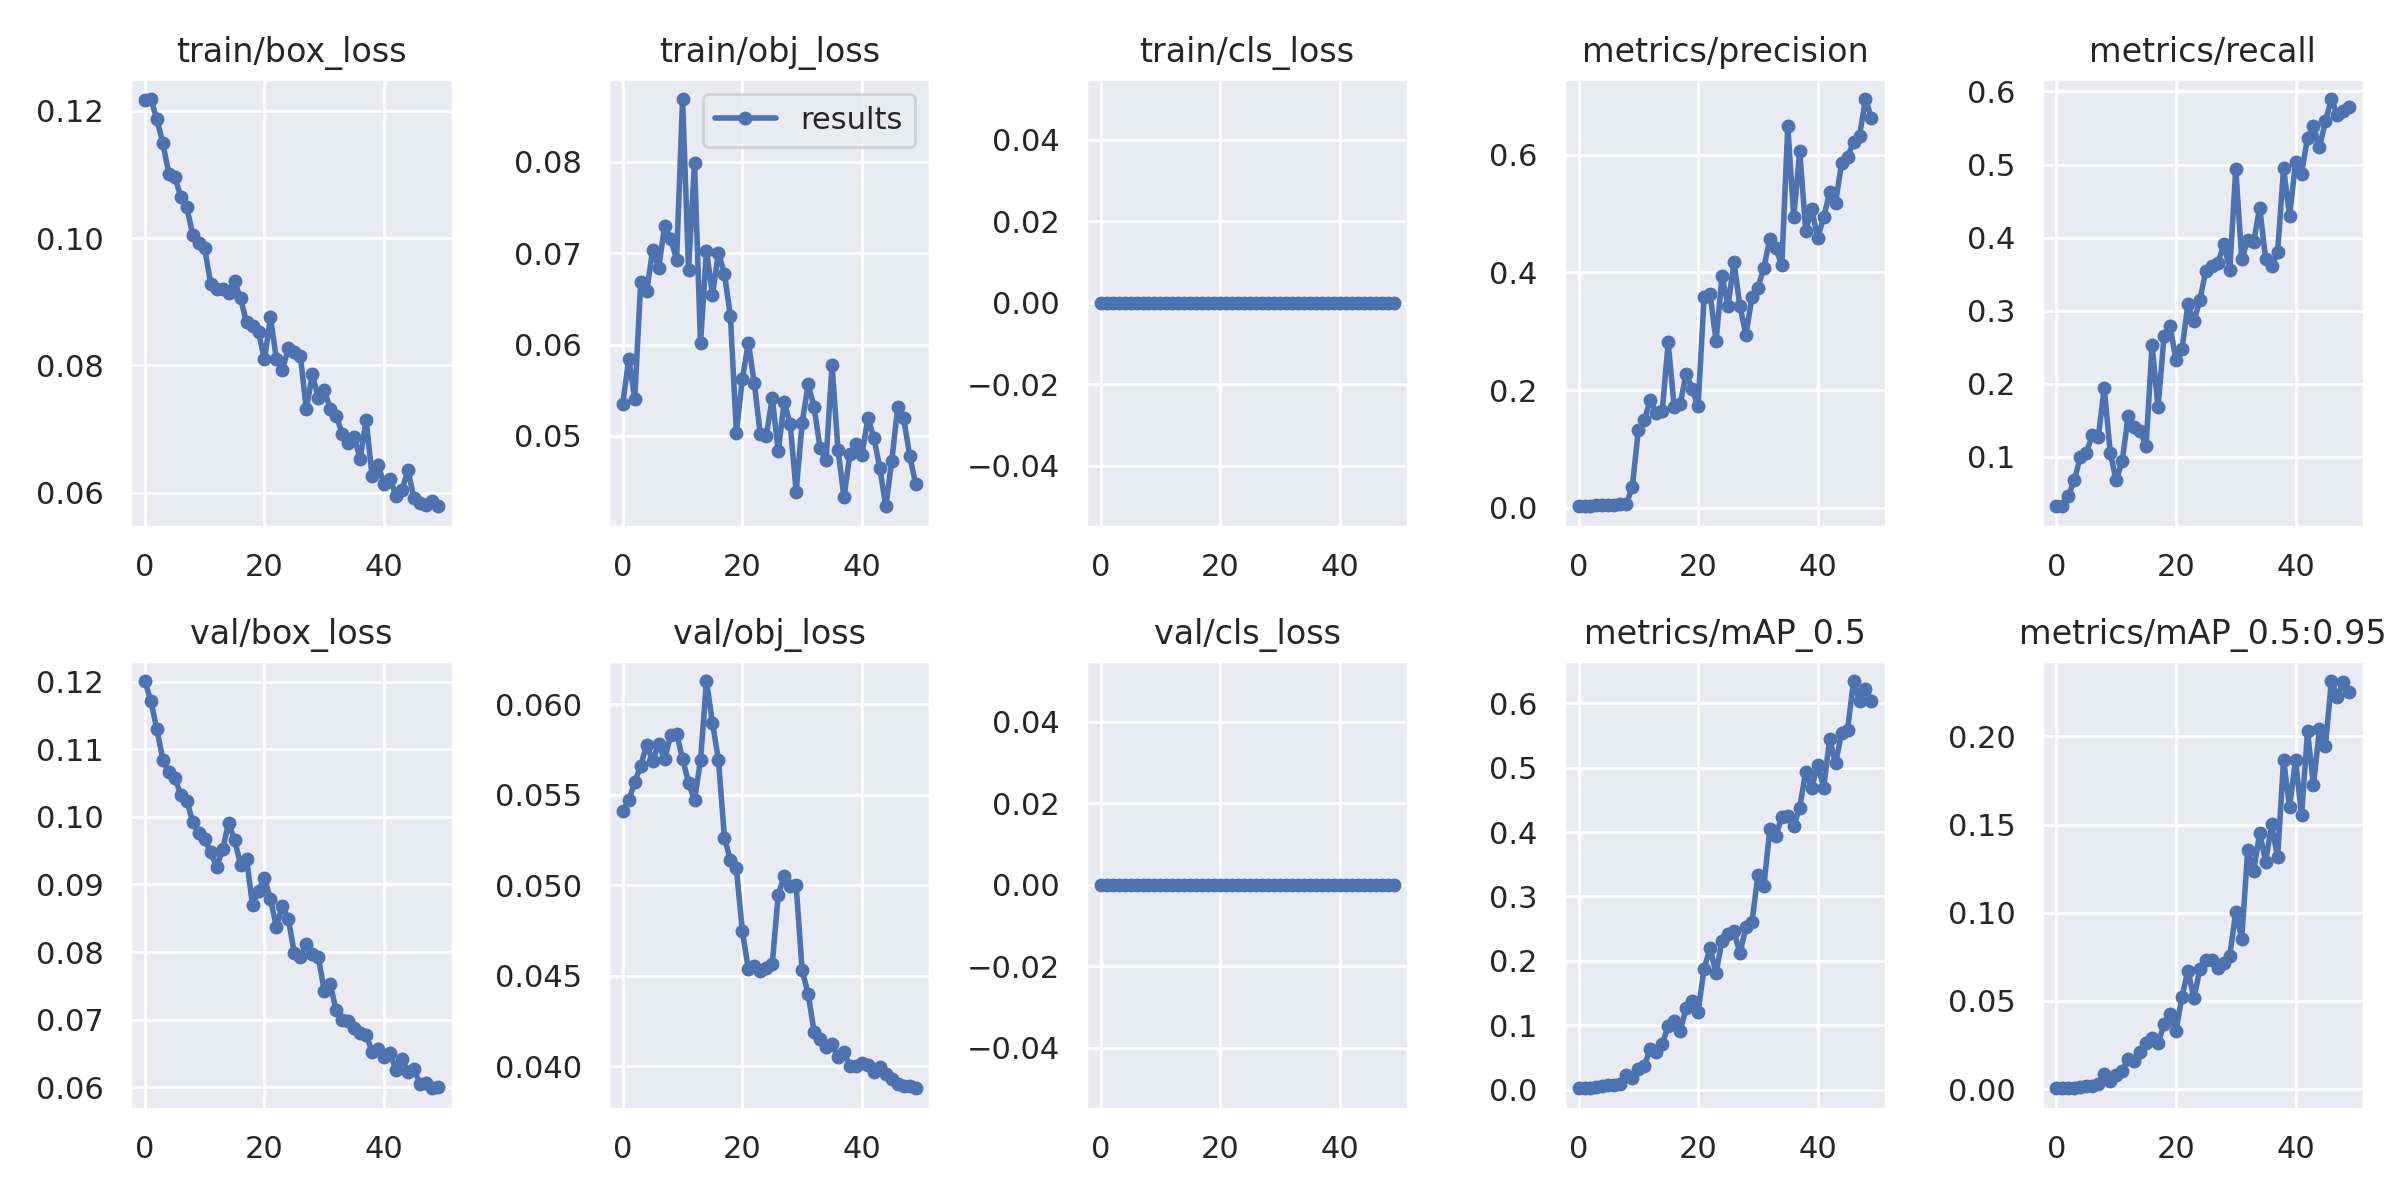

In [ ]:
# Revisamos los resultados del entrenamiento
!pip install Pillow
from PIL import Image
imagen = Image.open('/content/results.png')
imagen.show()

- Teniendo en cuenta las métricas anteriores, podemos considerar que tuvimos un muy buen entrenamiento del modelo, primero, lo podemos confirmar por el **box_loss** y **obj_loss**, la primera mide cuánto se ajusta el cuadro delimitador predicho al cuadro delimitador verdadero alrededor del objeto. Al tener una box_loss al final del entrenamiento de aproximadamente 0.06 en el conjunto de validación es una buena señal. ya que el error es bastante bajo

- Por otro lado, tener el obj_loss en aproximadamente 0.04 al final en el conjunto de validación tambien se puede considerar un valor bajo y muy bueno, teniendo en cuenta que esta mide si el objeto está presente en la imagen o no, por lo que el modelo aprendió a distinguir con precisión entre los objetos que se encuentran en la imagen y los que no lo están.

- Poco podemos decir de la métrica cls_loss ya que esta mide el error que hay entre objetos y clases y en este caso tenemos solo una clase

- Otro conjunto de metricas importante son la precision y el recall, la primera indica la proporción de objetos detectados que son verdaderos positivos en relación con el total de objetos detectados, y la segunda, indica la proporción de objetos verdaderamente positivos que fueron detectados en relación con el total de objetos que deberían haber sido detectados.

- Un valor de recall y precision de 0.6 significa que el modelo está detectando correctamente el 60% de los objetos verdaderos positivos y está clasificando correctamente el 60% de las detecciones como verdaderas positivas. En otras palabras, el modelo está obteniendo una detección y clasificación correcta en el 60% de los casos

- Por ultimo, podemos ver la métrica mAP_0.5 (media de precisión promedio con umbral de IoU de 0.5) esta se refiere a la cantidad de superposición necesaria entre el objeto detectado y el objeto real para considerar que la detección es correcta. Un mAP_0.5 de 0.6 indica que, en promedio, el modelo detecta correctamente el 60% de los objetos con un umbral de IoU de 0.5 y la métrica de mAP_0.5:0.95 (media de precisión promedio con umbrales de IoU de 0.5 a 0.95) es una medida que considera la precisión del modelo en una gama de umbrales de IoU. Un mAP_0.5:0.95 de 0.2 indica que, en promedio, el modelo detecta correctamente el 20% de los objetos con un umbral de IoU que varía entre 0.5 y 0.95.



**Revisamos algunas métricas**

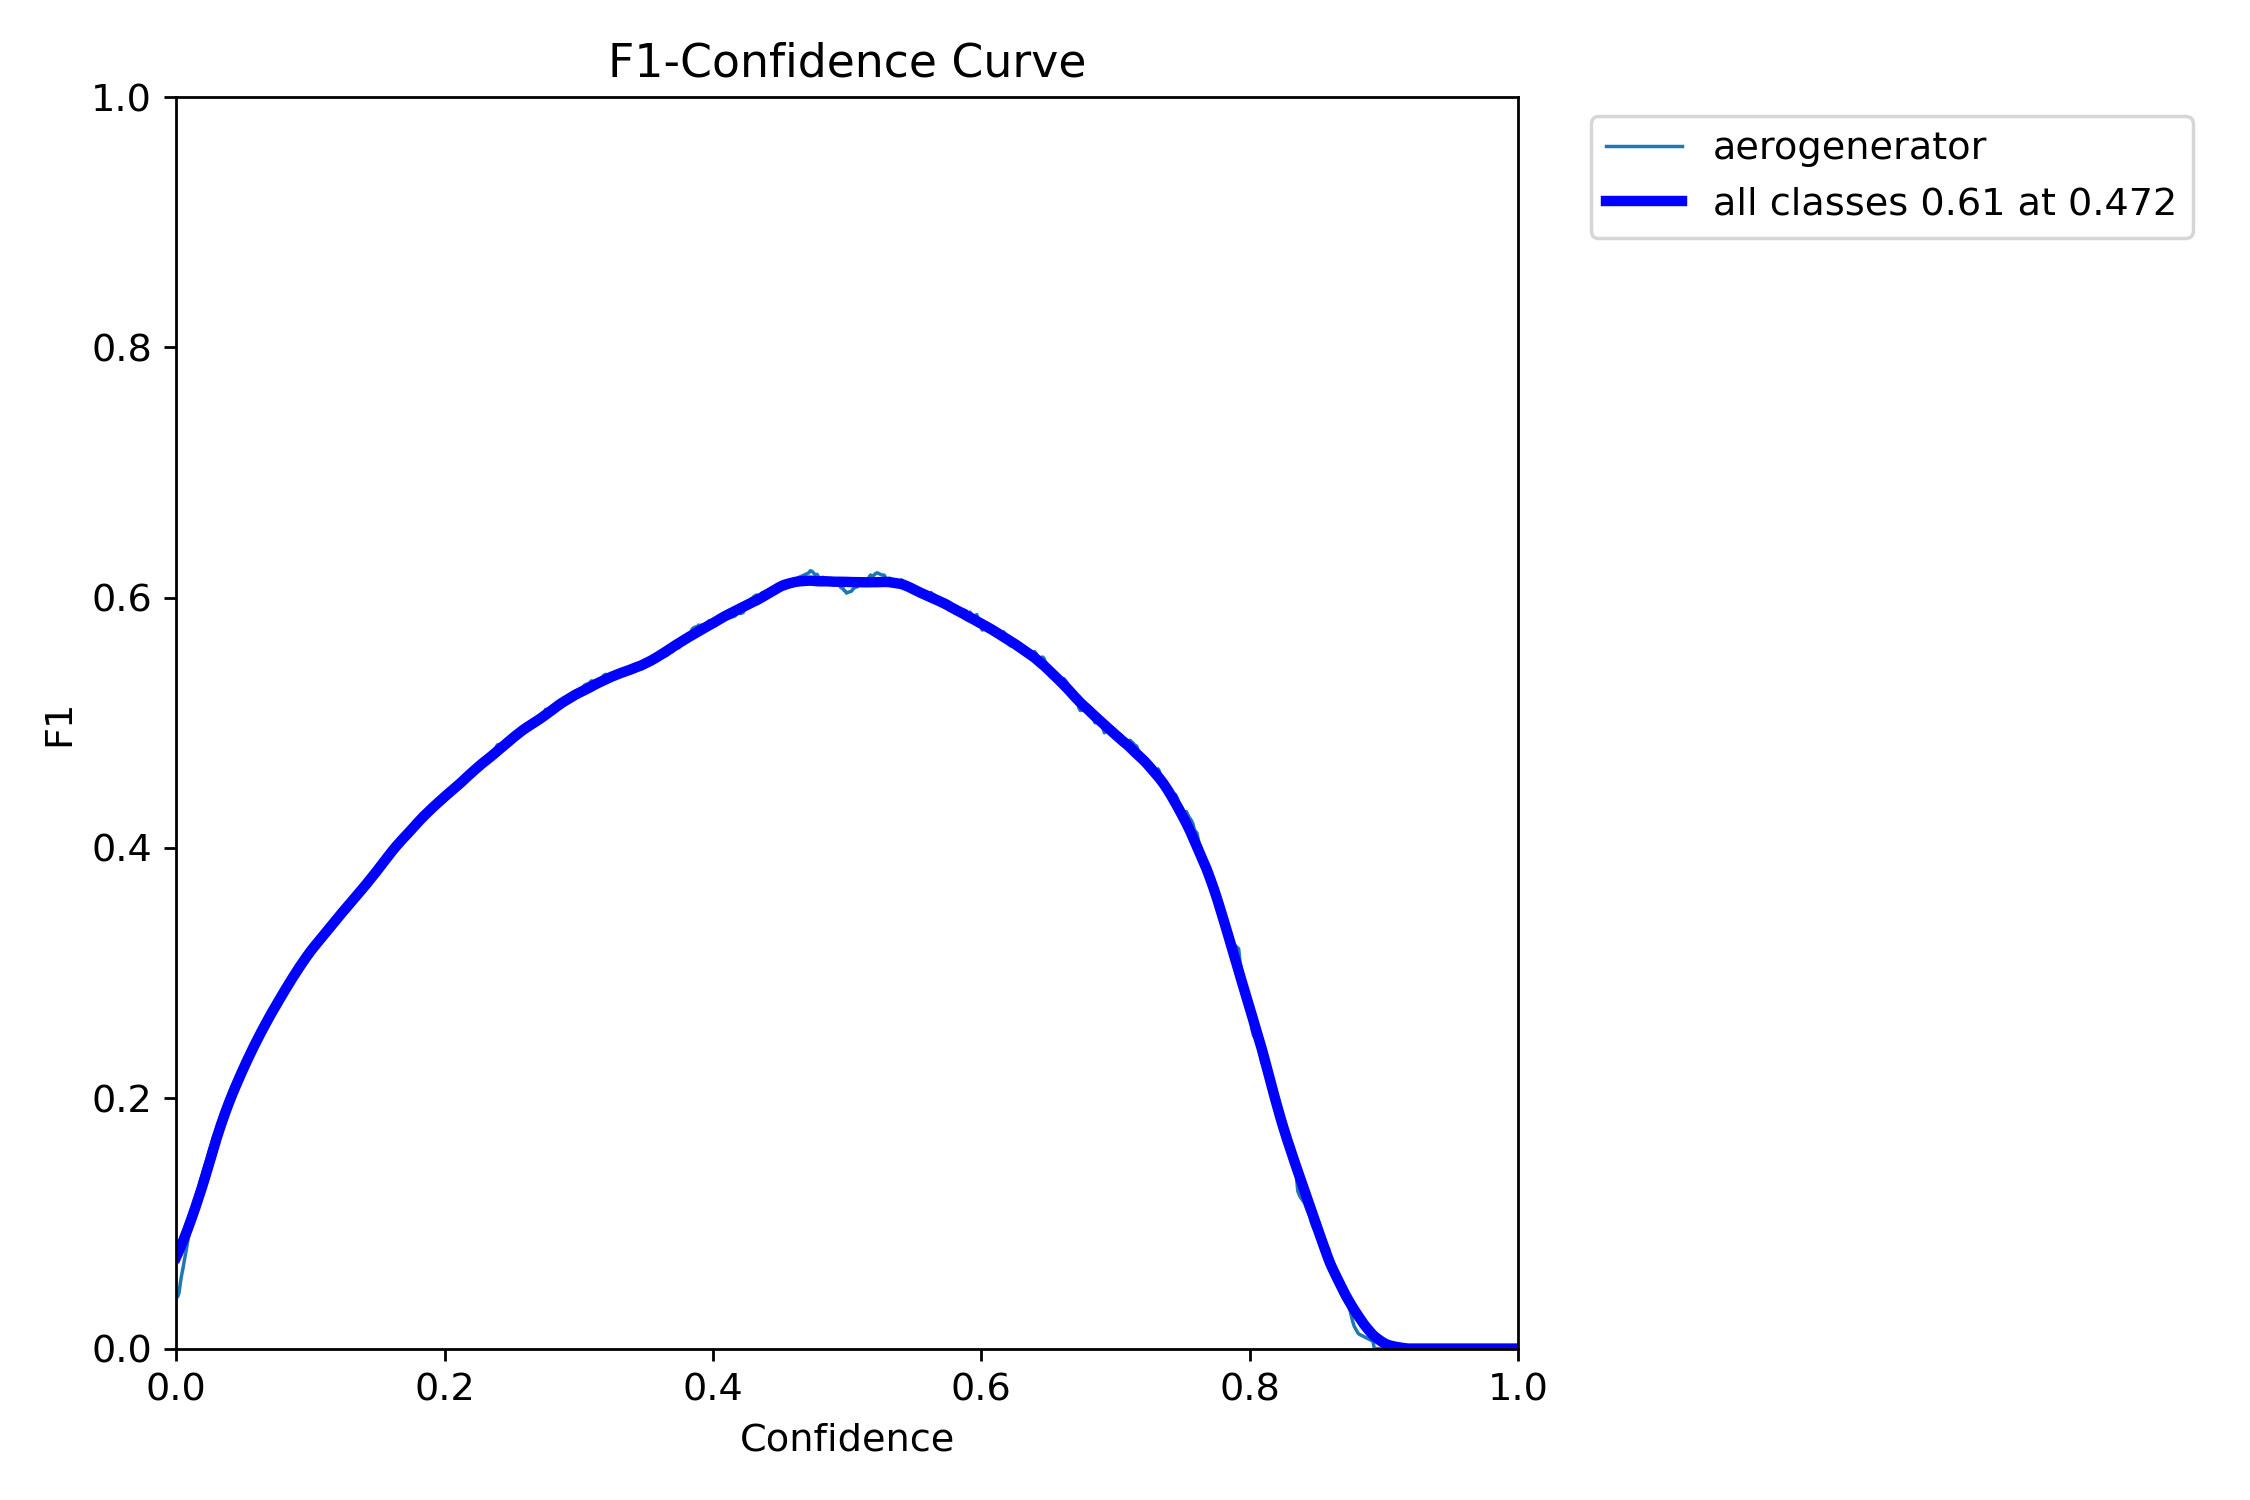

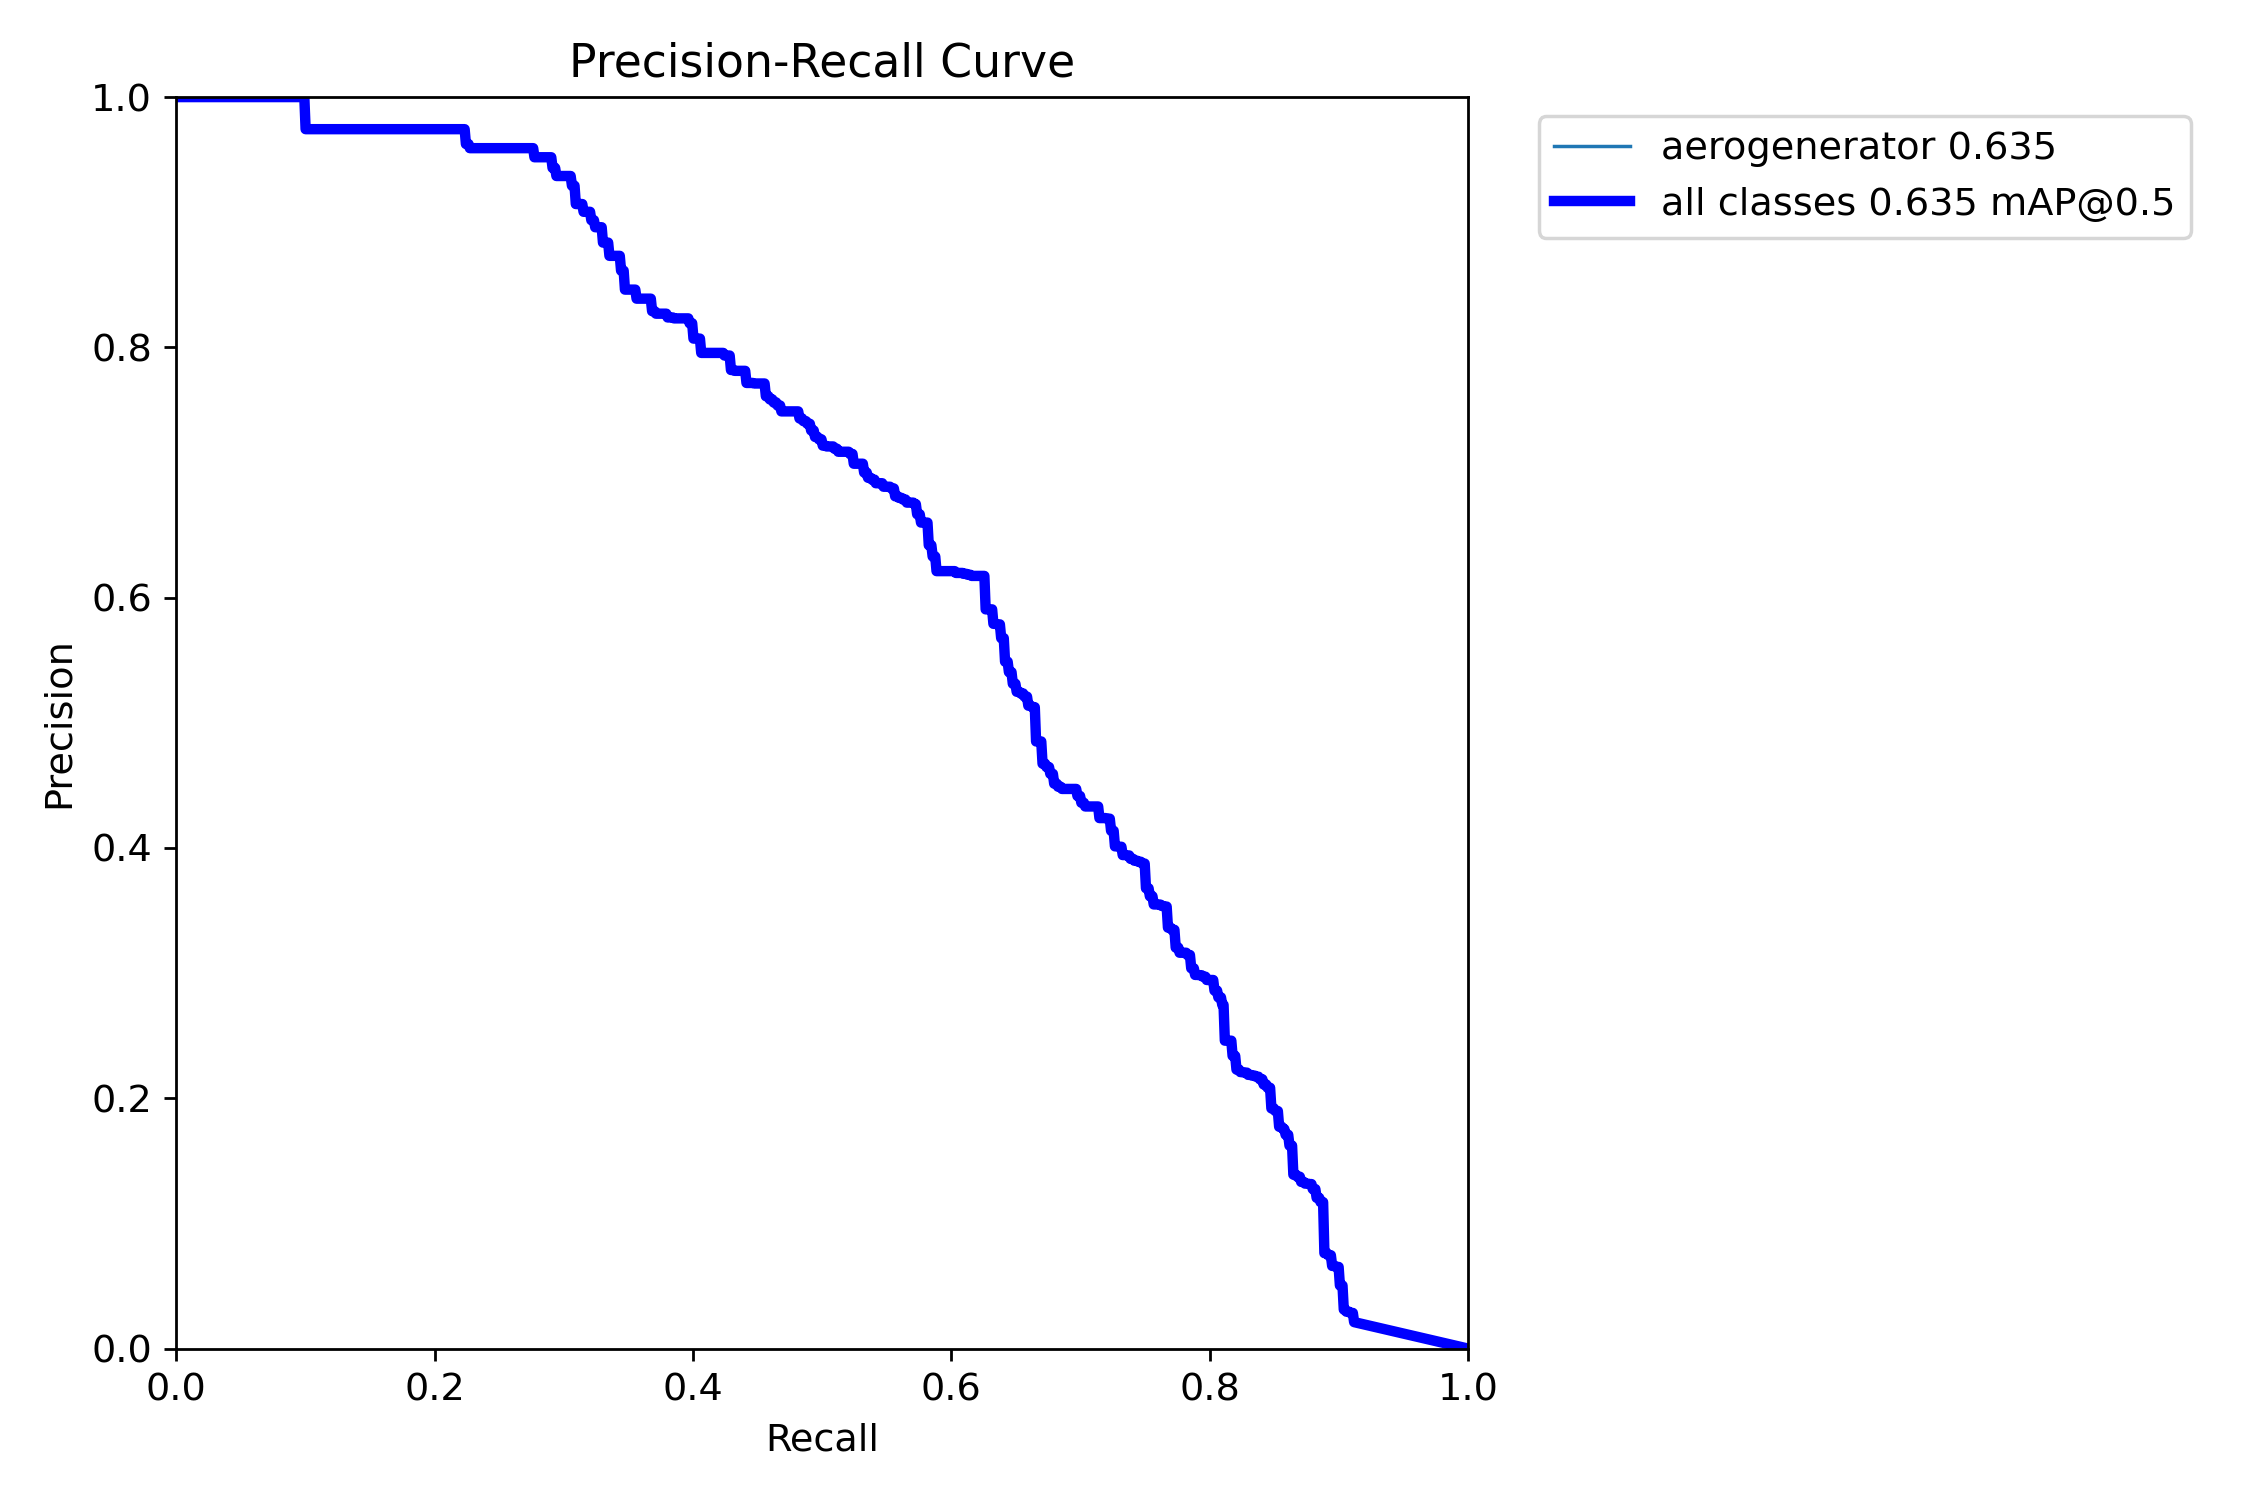

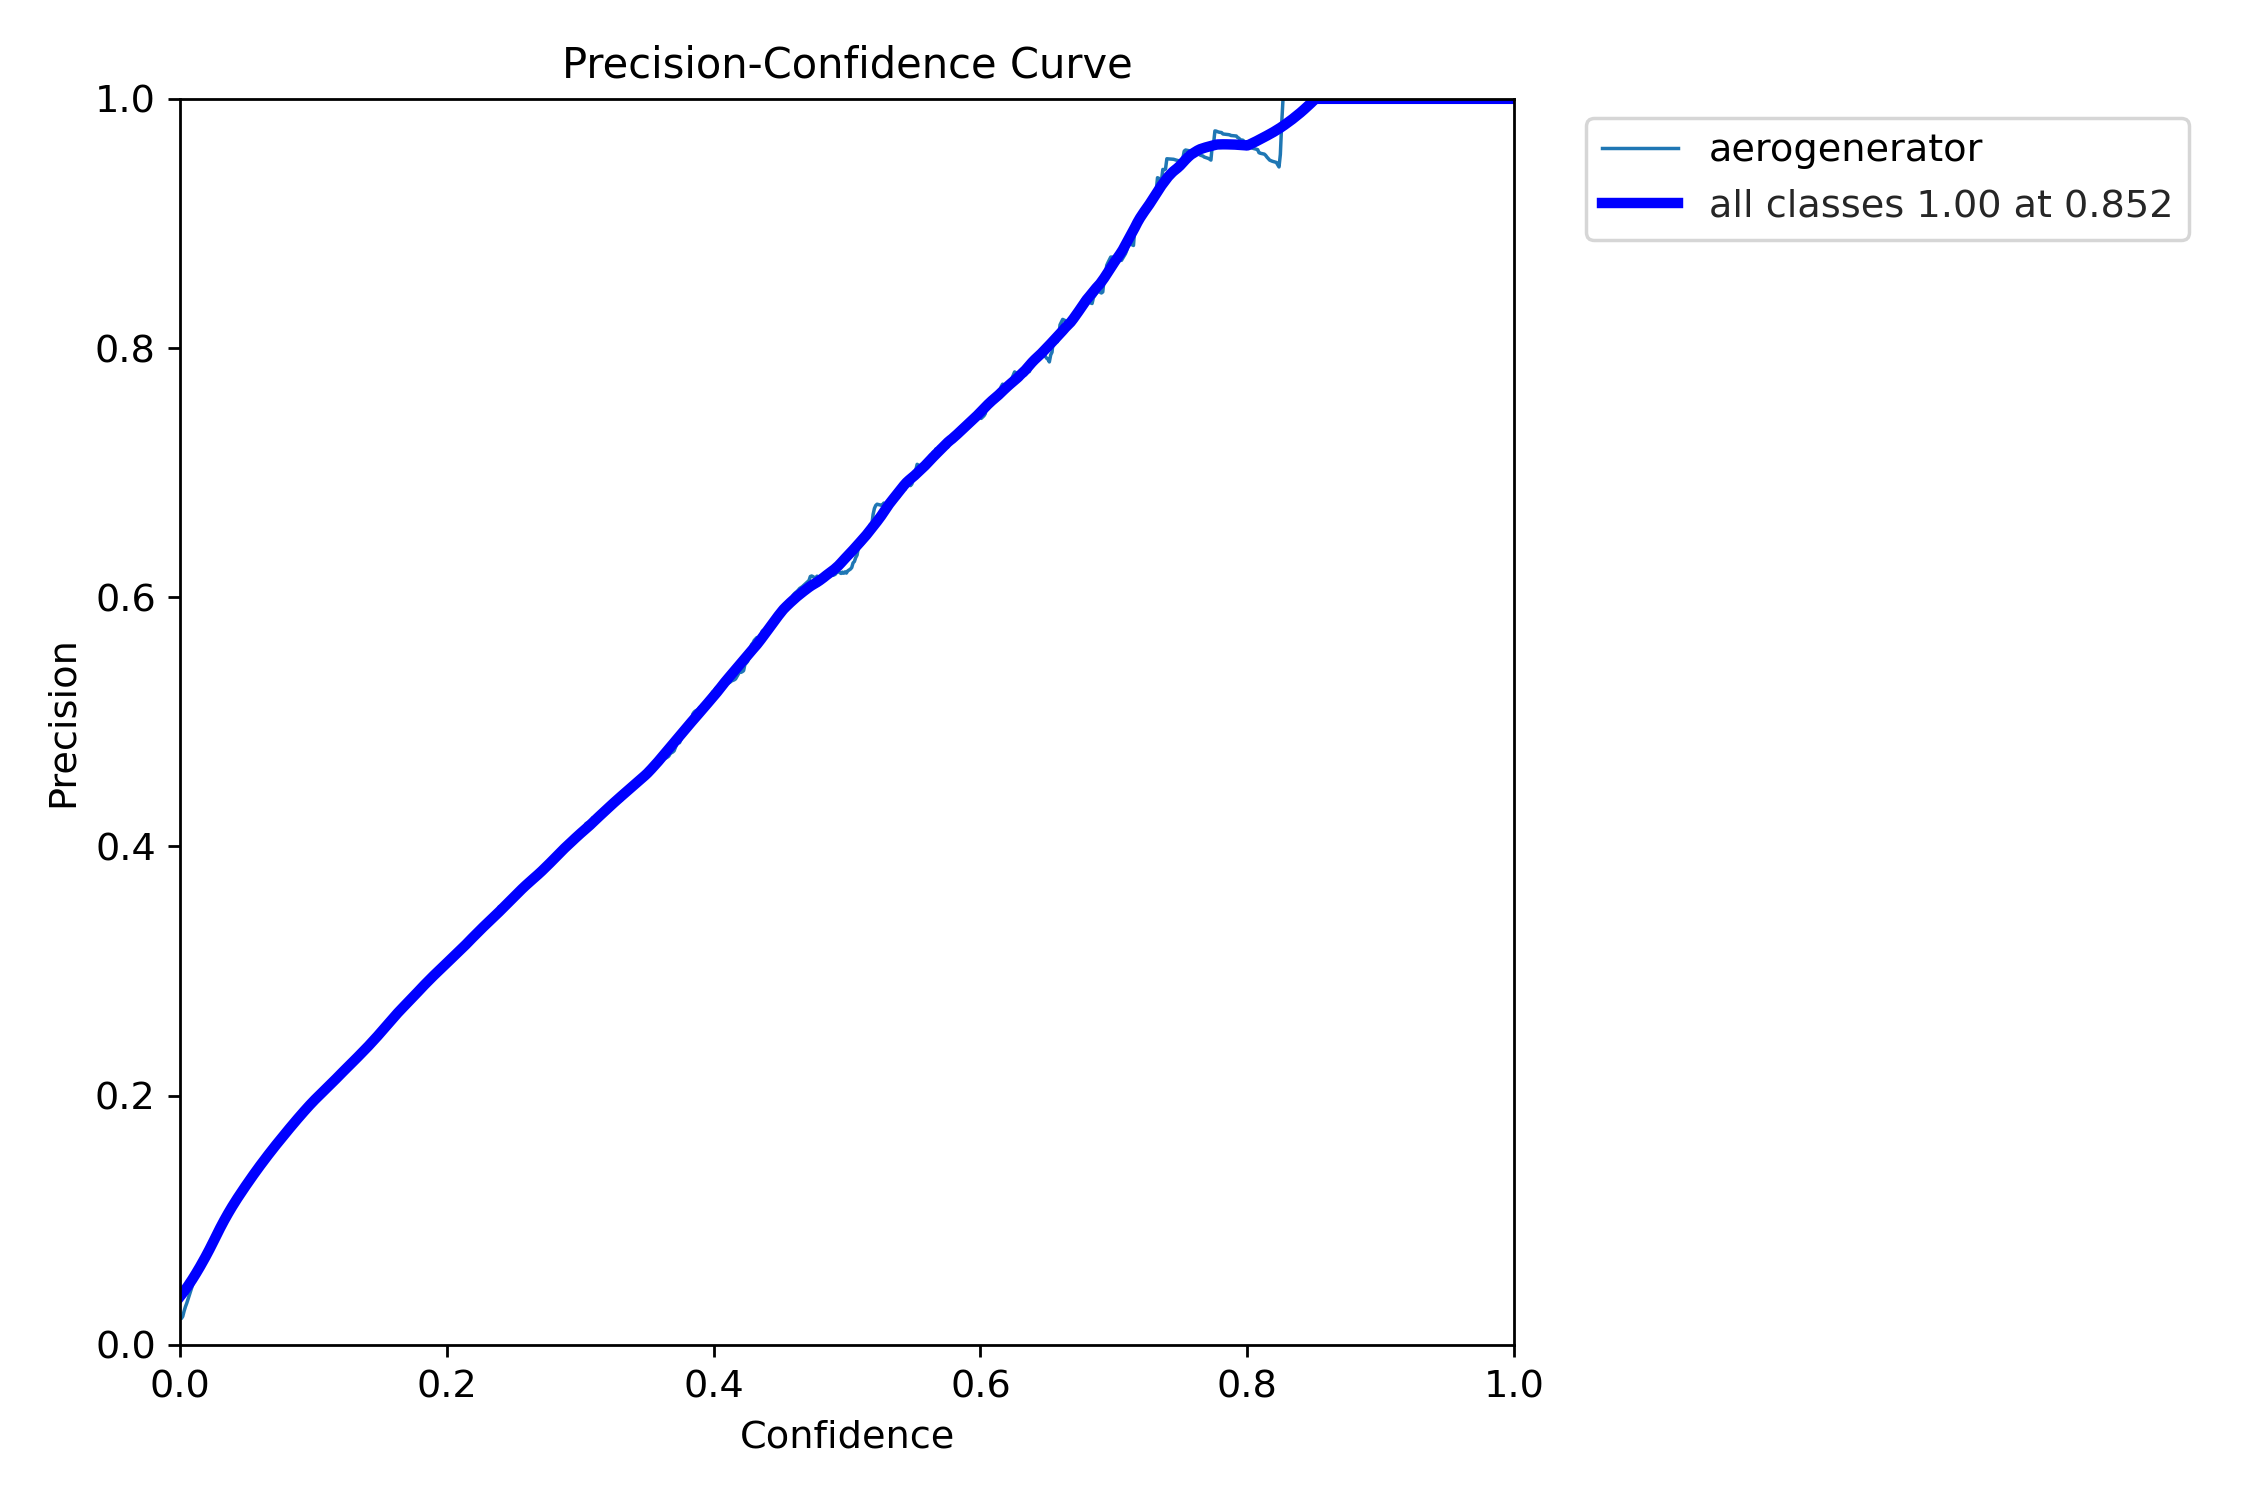

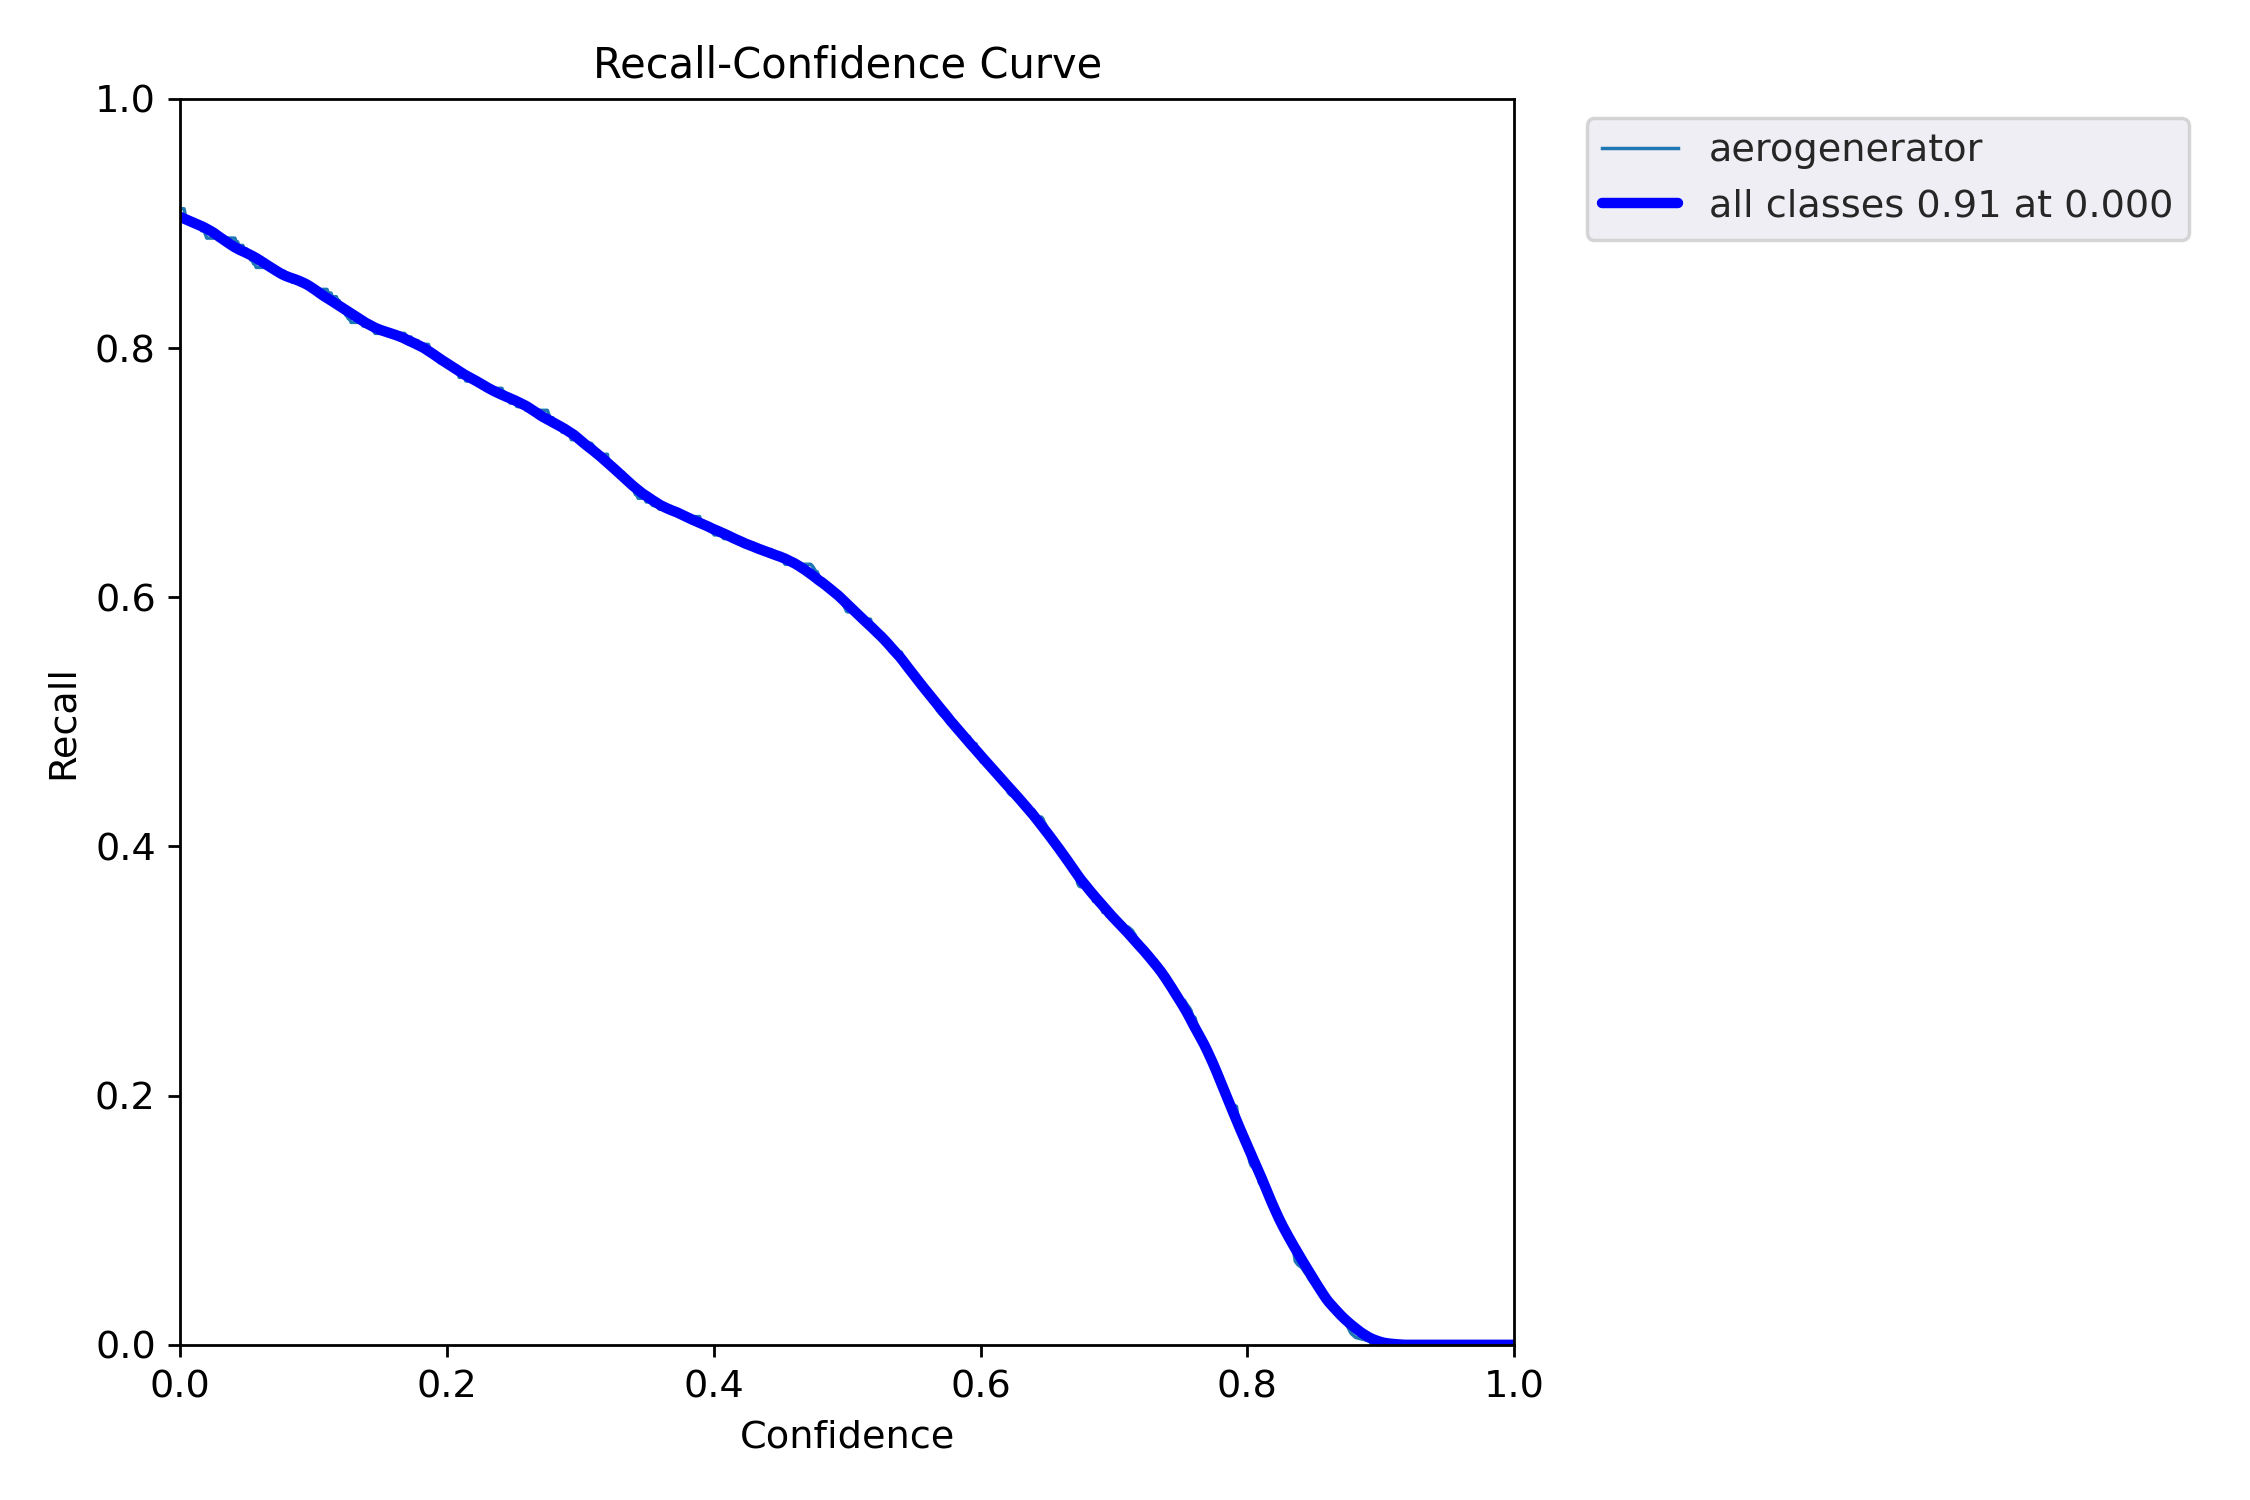

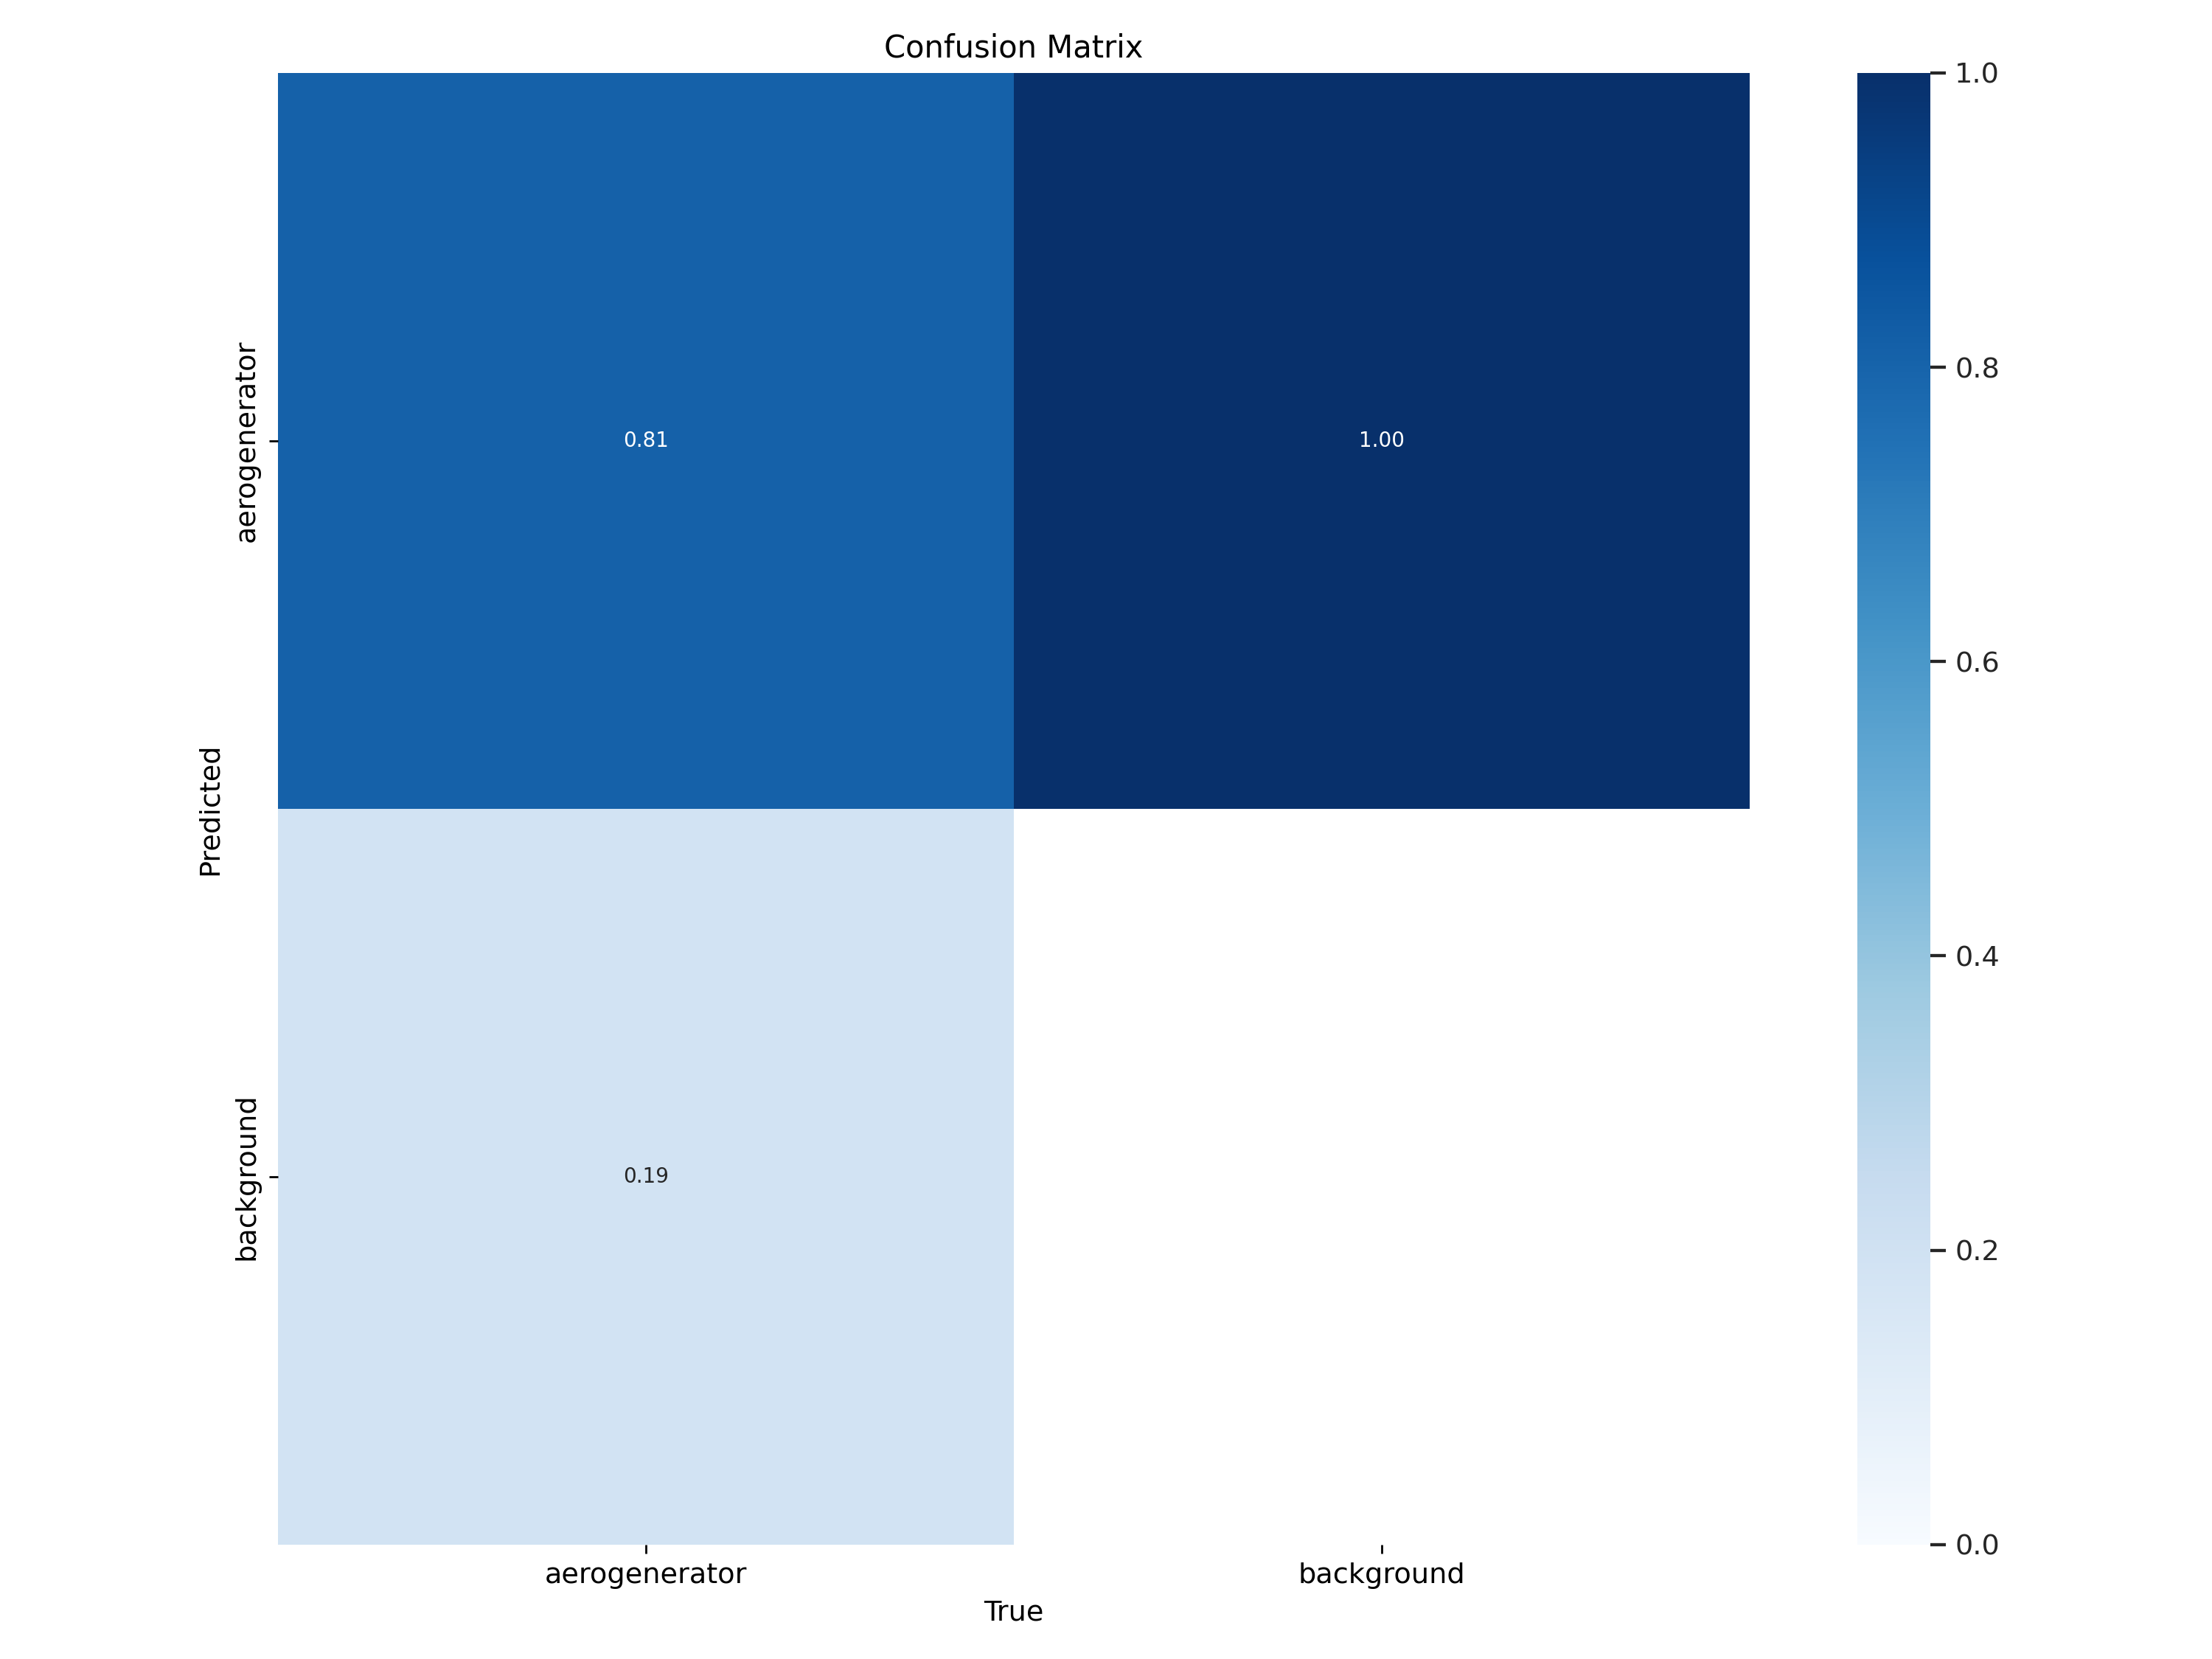

In [ ]:
for image in ['F1_curve', 'PR_curve', 'P_curve', 'R_curve', 'confusion_matrix']:
  imagen = Image.open(f'/content/{image}.png')
  imagen.show()

- Hablando de estas métricas, la curva de F1-Confidence parabólica nos puede indica que el modelo tiene un punto óptimo donde detecta la mayoría de los objetos verdaderos con el menor número posible de falsas detecciones, que en este caso fue 0.6 o 60%. A medida que la confianza aumenta, el modelo se vuelve demasiado restrictivo y pierde objetos verdaderos, lo que lleva a una disminución en el F1.

- Para la curva Precision-Recall, esta comienza en (0,1) y luego el Recall disminuye a medida que se aumenta la precisión, esto puede signicar que el modelo inicialmente recuperó todos los elementos relevantes y los clasificó correctamente, pero a medida que se requiere una mayor precisión, el modelo se vuelve más selectivo en la clasificación y comienza a perder algunos elementos relevantes, lo que resulta en una disminución del Recall.

- La 3 grafica nos indica algo interesante, ya que a medida que aumenta el umbral de confianza, se detectan menos objetos, pero la precisión también aumenta. Por lo tanto, a medida que se aumenta la confianza, la precisión aumenta de manera proporcional, y en este caso, el pico mas alto es en 1 o 100%, por lo que significa que el modelo ha logrado identificar correctamente todos los objetos relevantes en la imagen, sin generar falsos positivos

- Por último y para este caso, que el recall empiece en 0.9 significa que el modelo está detectando correctamente el 90% de los objetos reales en la imagen con una confianza baja. A medida que aumenta la confianza, el modelo se vuelve más selectivo y comienza a detectar menos objetos, lo que resulta en una disminución en el recall.

**5. Inferencias al modelo:** 





In [ ]:
# Importamos y descomprimos las imagenes de testeo para hacer inferencias
!unzip -q /content/images_test.zip -d ../

replace ../images_test/windmill95_jpg.rf.30489b4f82d6cb791ea014639ff13369.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: A


**- Inferencia 1**

Las inferencias al modelo se pueden hacer de la siguiente manera:

- **!python detect.py:** este comando indica que se va a ejecutar un script de Python llamado detect.py, el cual se encuentra en la ruta actual.

- **weights /content/yolov5/runs/train/exp/weights/best.pt:** este parámetro especifica la ubicación del archivo de pesos del modelo que se utilizará para realizar las inferencias.

- **img 640:** este parámetro indica el tamaño de la imagen que se va a procesar en píxeles. En este caso, la imagen se redimensionará a 640 píxeles antes de realizar la detección de objetos.

- **conf 0.25:** este parámetro establece el umbral de confianza para la detección de objetos. En este caso, solo se mostrarán los objetos que el modelo estime que tienen una probabilidad de detección superior al 25%.

- **source "/content/images_test/...jpg":** este parámetro especifica la ubicación de la imagen que se va a procesar.

- **display.Image(filename='/content/yolov5/runs/detect/exp/...jpg', width=600):** este comando carga la imagen resultante en consola de la ruta /content/yolov5/runs/detect/exp/ con el mismo nombre que la imagen original. El parámetro width establece el ancho de la imagen en píxeles.

detect: weights=['/content/yolov5/runs/train/exp/weights/best.pt'], source=/content/images_test/windmill95_jpg.rf.30489b4f82d6cb791ea014639ff13369.jpg, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
requirements: /content/requirements.txt not found, check failed.
YOLOv5 🚀 v7.0-147-gaa7c45c Python-3.9.16 torch-2.0.0+cu118 CPU

Fusing layers... 
Model summary: 157 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs
image 1/1 /content/images_test/windmill95_jpg.rf.30489b4f82d6cb791ea014639ff13369.jpg: 384x640 2 aerogenerators, 240.4ms
Speed: 2.1ms pre-process, 240.4ms inference, 1.2ms NMS per image at shape (1, 3, 640, 640)
Results saved to runs/

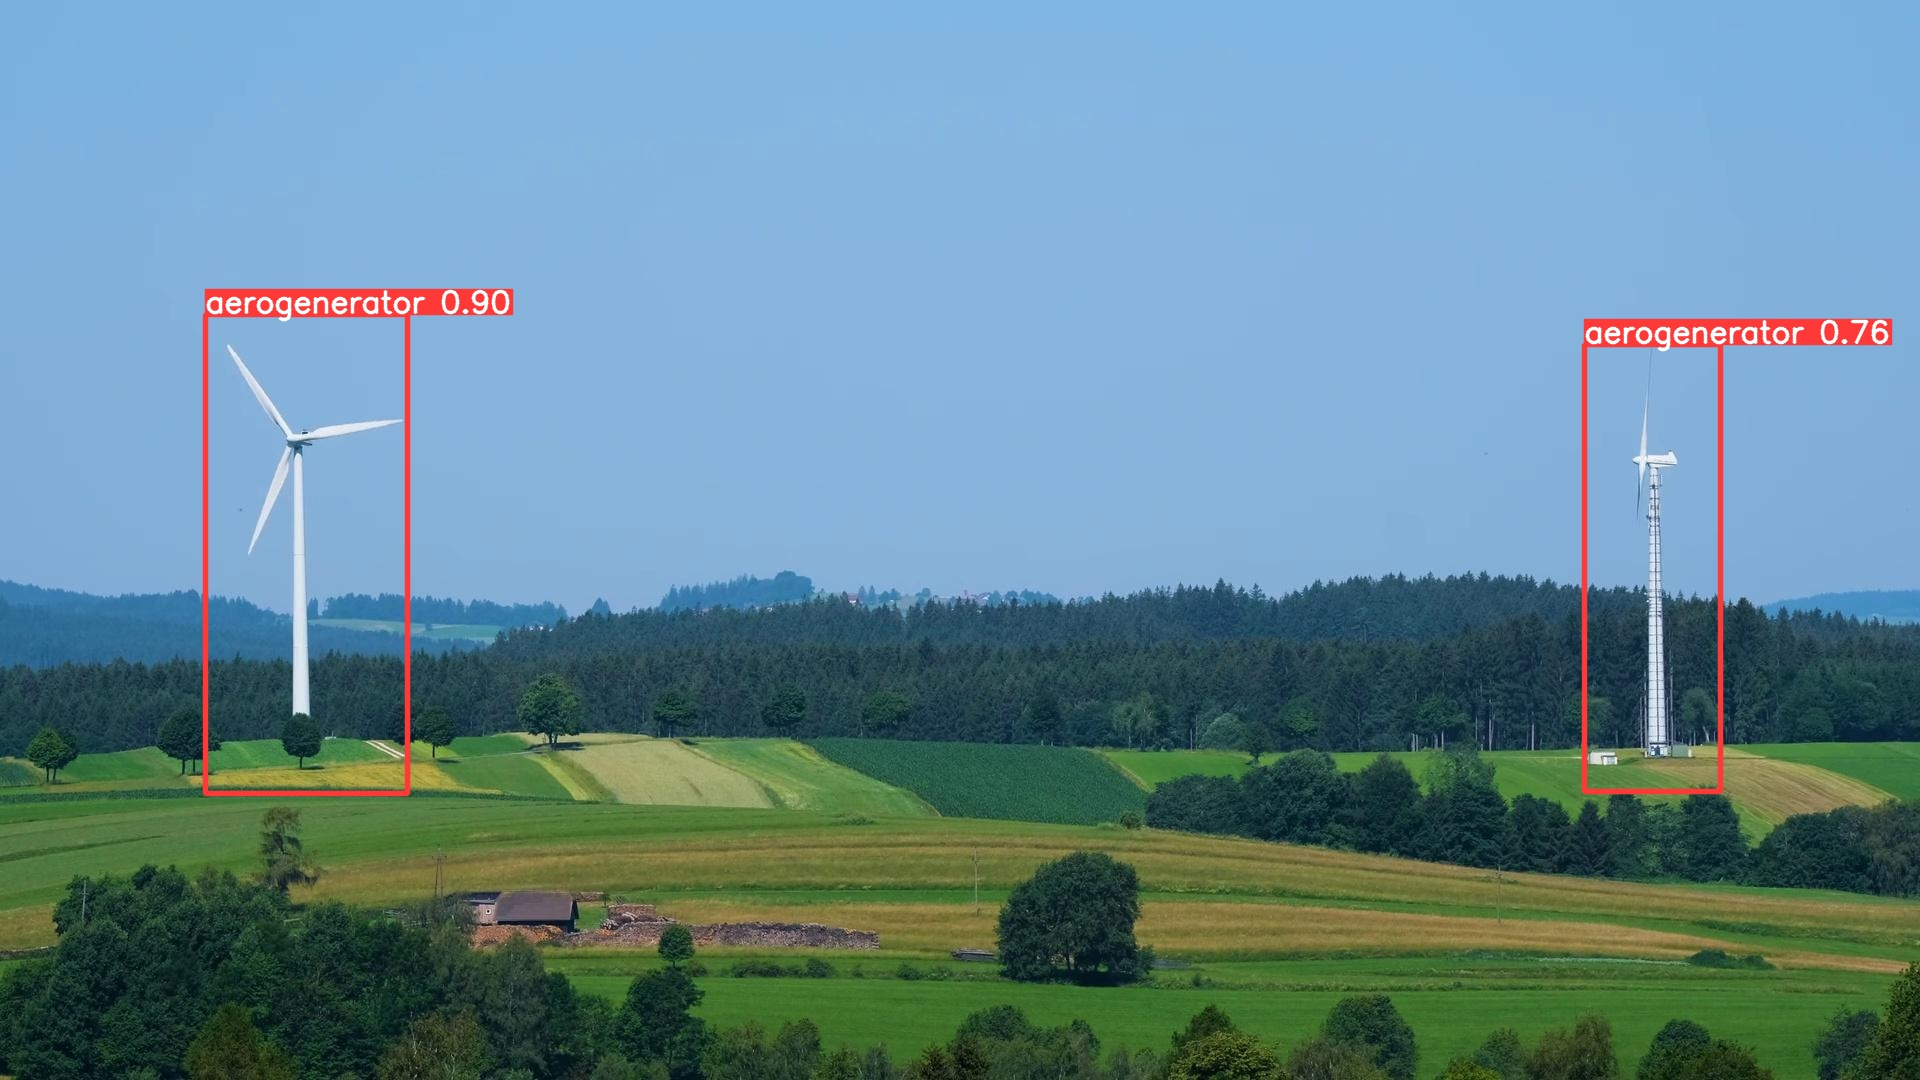

In [ ]:
# Realizamos inferencias utilizando los pesos mejores pesos de la red encontrados durante el entrenamiento
!python detect.py --weights /content/yolov5/runs/train/exp/weights/best.pt --img 640 --conf 0.25 --source "/content/images_test/windmill95_jpg.rf.30489b4f82d6cb791ea014639ff13369.jpg"
display.Image(filename='/content/yolov5/runs/detect/exp/windmill95_jpg.rf.30489b4f82d6cb791ea014639ff13369.jpg', width=600)

**- Inferencia 2**

detect: weights=['/content/yolov5/runs/train/exp/weights/best.pt'], source=/content/images_test/windmill95_jpg.rf.e63a04ee05b09a23ee65cfe5d37b9043.jpg, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
requirements: /content/requirements.txt not found, check failed.
YOLOv5 🚀 v7.0-147-gaa7c45c Python-3.9.16 torch-2.0.0+cu118 CPU

Fusing layers... 
Model summary: 157 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs
image 1/1 /content/images_test/windmill95_jpg.rf.e63a04ee05b09a23ee65cfe5d37b9043.jpg: 384x640 7 aerogenerators, 376.3ms
Speed: 2.4ms pre-process, 376.3ms inference, 1.7ms NMS per image at shape (1, 3, 640, 640)
Results saved to runs/

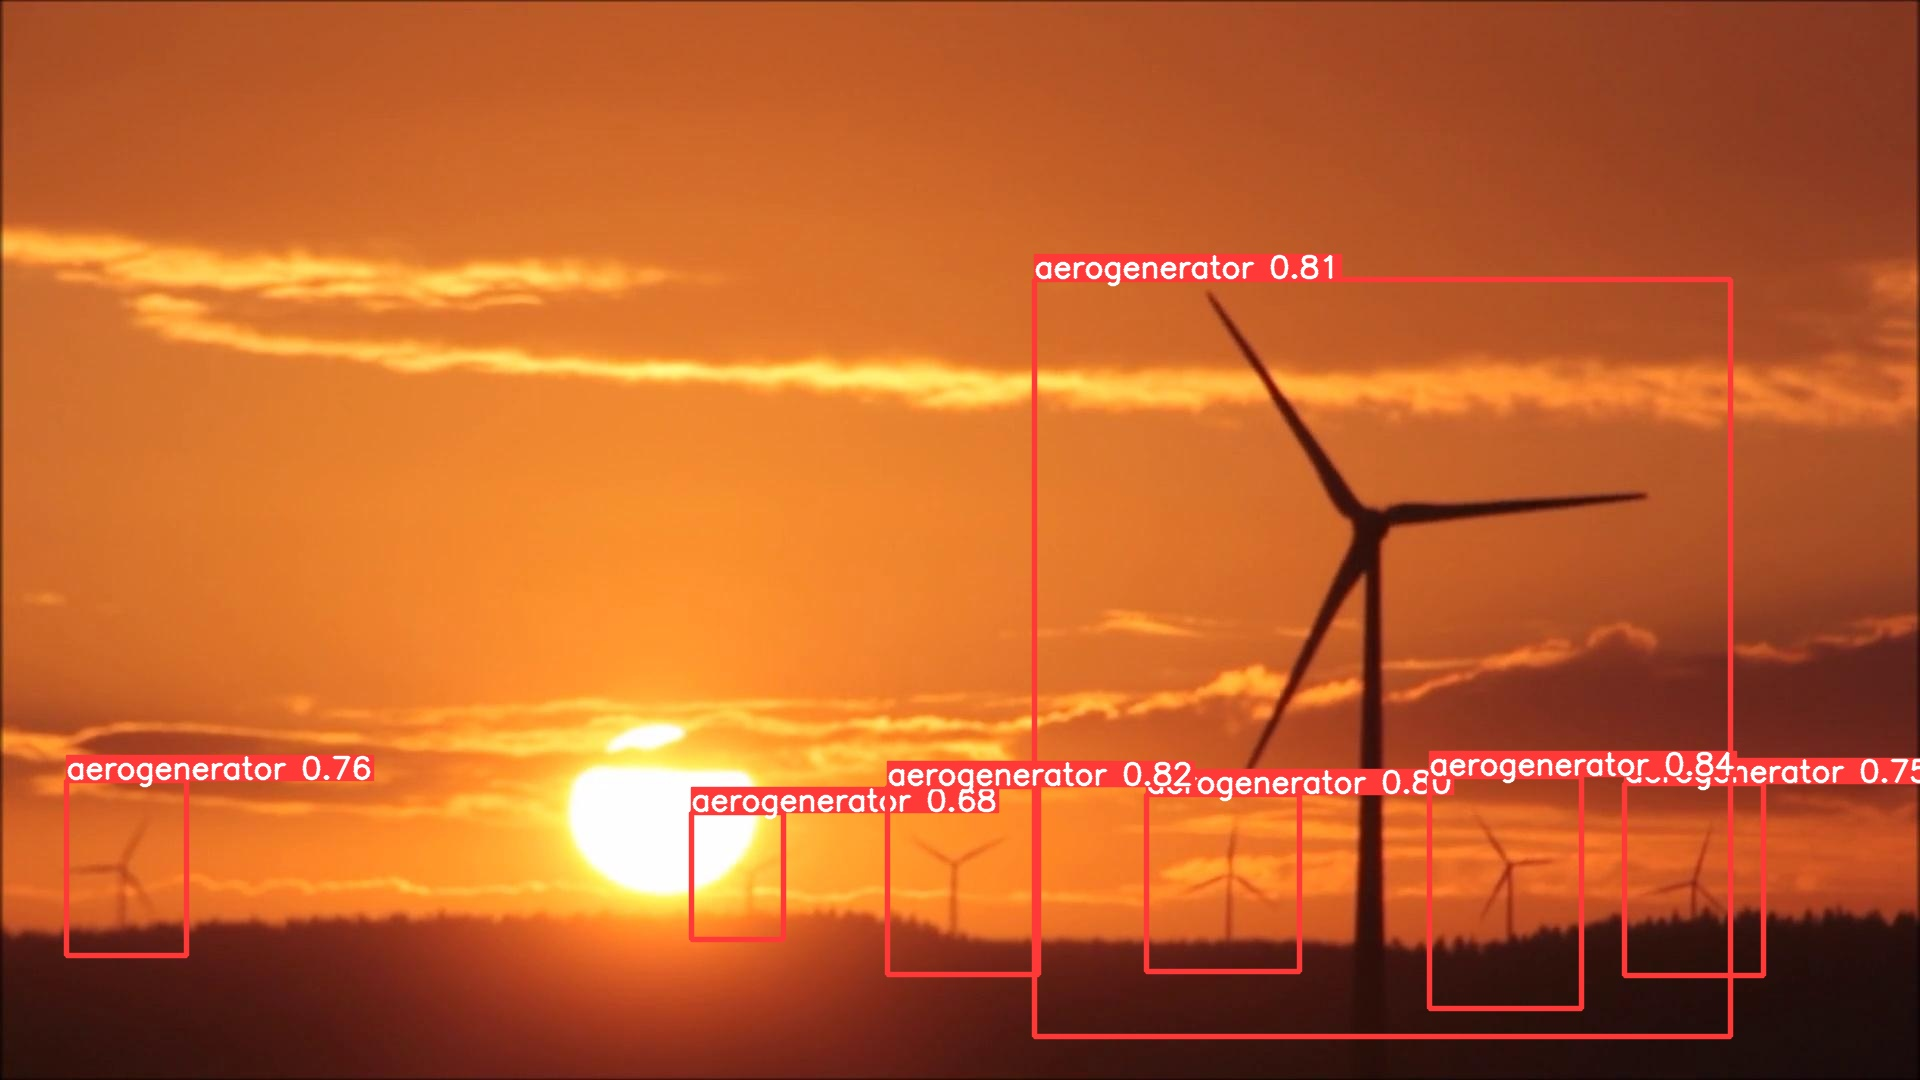

In [ ]:
!python detect.py --weights /content/yolov5/runs/train/exp/weights/best.pt --img 640 --conf 0.25 --source "/content/images_test/windmill95_jpg.rf.e63a04ee05b09a23ee65cfe5d37b9043.jpg"
display.Image(filename='/content/yolov5/runs/detect/exp2/windmill95_jpg.rf.e63a04ee05b09a23ee65cfe5d37b9043.jpg', width=600)

**- Inferencia 3**

detect: weights=['/content/yolov5/runs/train/exp/weights/best.pt'], source=/content/images_test/windmill96_jpg.rf.d0ee70a5e302d573beee07ecc6fa812e.jpg, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
requirements: /content/requirements.txt not found, check failed.
YOLOv5 🚀 v7.0-147-gaa7c45c Python-3.9.16 torch-2.0.0+cu118 CPU

Fusing layers... 
Model summary: 157 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs
image 1/1 /content/images_test/windmill96_jpg.rf.d0ee70a5e302d573beee07ecc6fa812e.jpg: 384x640 10 aerogenerators, 246.6ms
Speed: 2.1ms pre-process, 246.6ms inference, 1.3ms NMS per image at shape (1, 3, 640, 640)
Results saved to runs

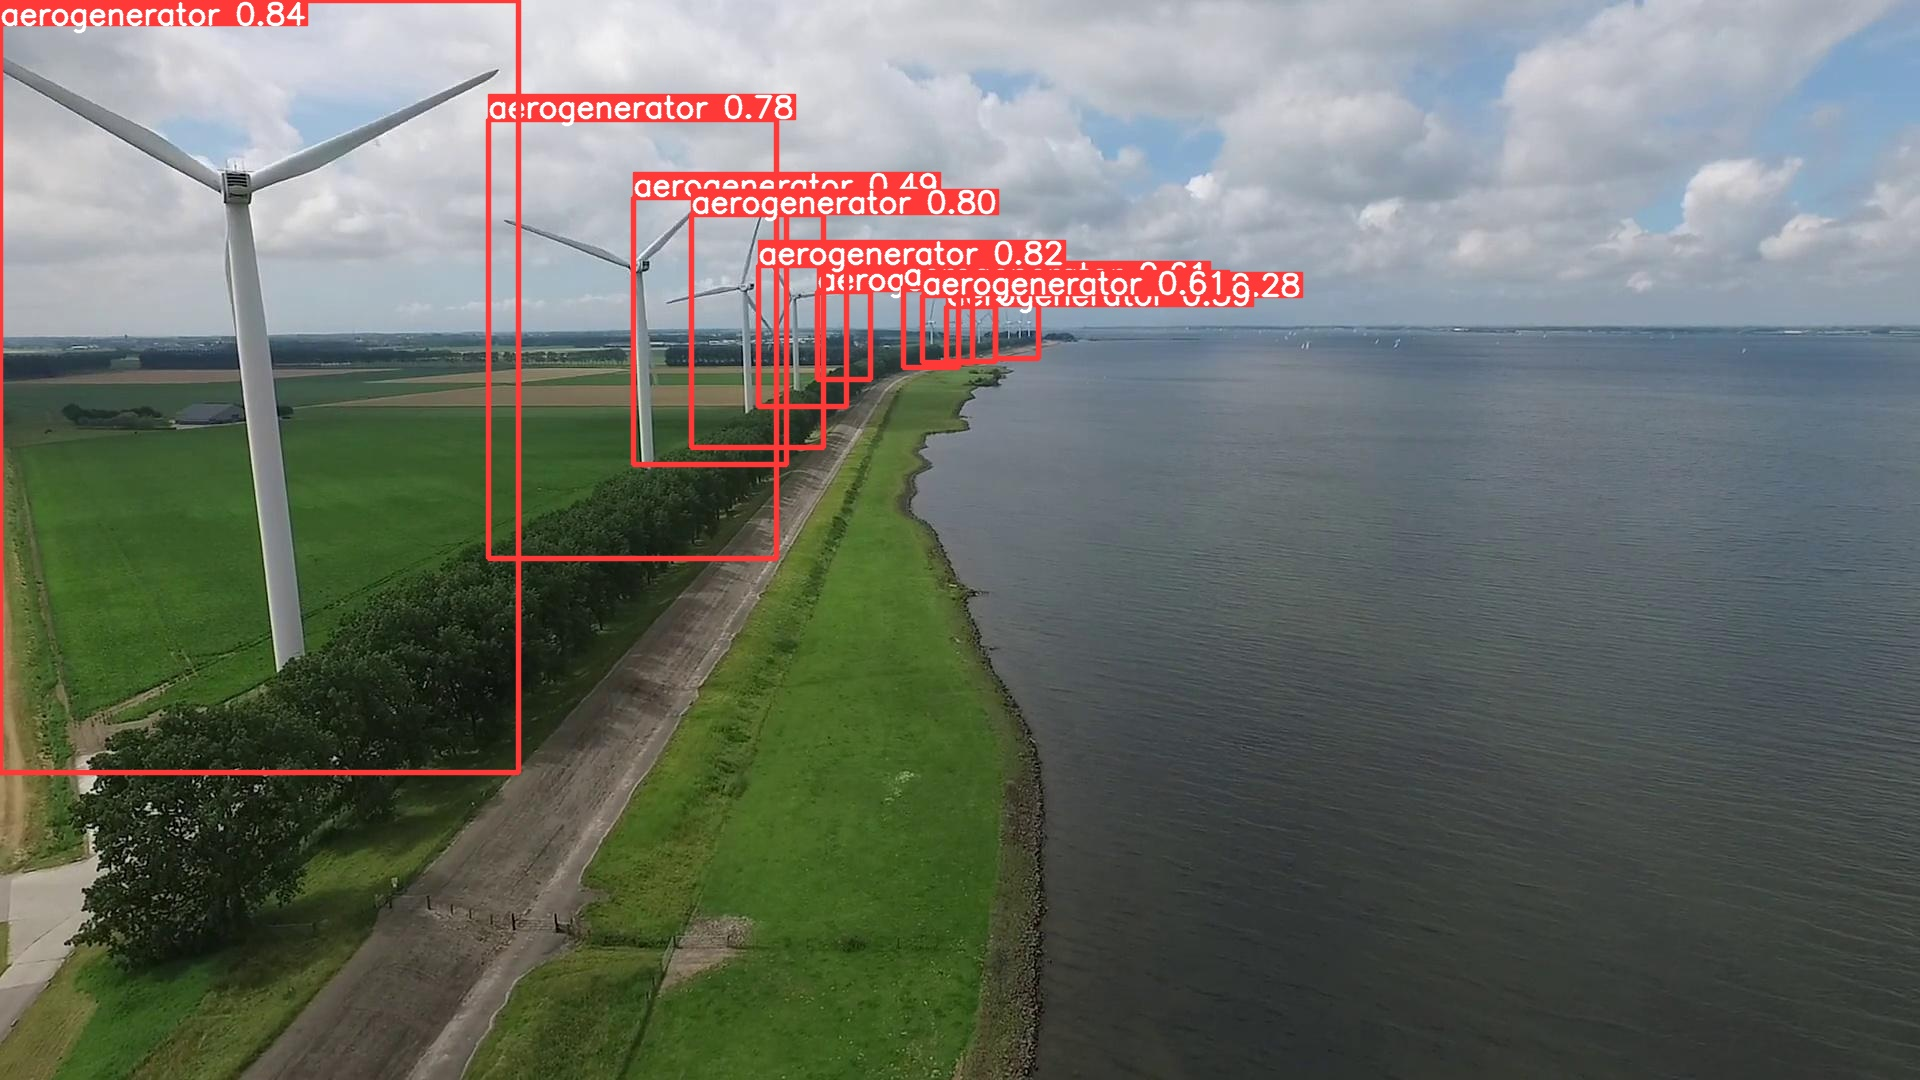

In [ ]:
!python detect.py --weights /content/yolov5/runs/train/exp/weights/best.pt --img 640 --conf 0.25 --source "/content/images_test/windmill96_jpg.rf.d0ee70a5e302d573beee07ecc6fa812e.jpg"
display.Image(filename='/content/yolov5/runs/detect/exp3/windmill96_jpg.rf.d0ee70a5e302d573beee07ecc6fa812e.jpg', width=600)

**- Inferencia 4**

detect: weights=['/content/yolov5/runs/train/exp/weights/best.pt'], source=/content/images_test/windmill97_jpg.rf.c69e938674a305211b1907171023f4f3.jpg, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
requirements: /content/requirements.txt not found, check failed.
YOLOv5 🚀 v7.0-147-gaa7c45c Python-3.9.16 torch-2.0.0+cu118 CPU

Fusing layers... 
Model summary: 157 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs
image 1/1 /content/images_test/windmill97_jpg.rf.c69e938674a305211b1907171023f4f3.jpg: 384x640 7 aerogenerators, 358.3ms
Speed: 3.2ms pre-process, 358.3ms inference, 2.2ms NMS per image at shape (1, 3, 640, 640)
Results saved to runs/

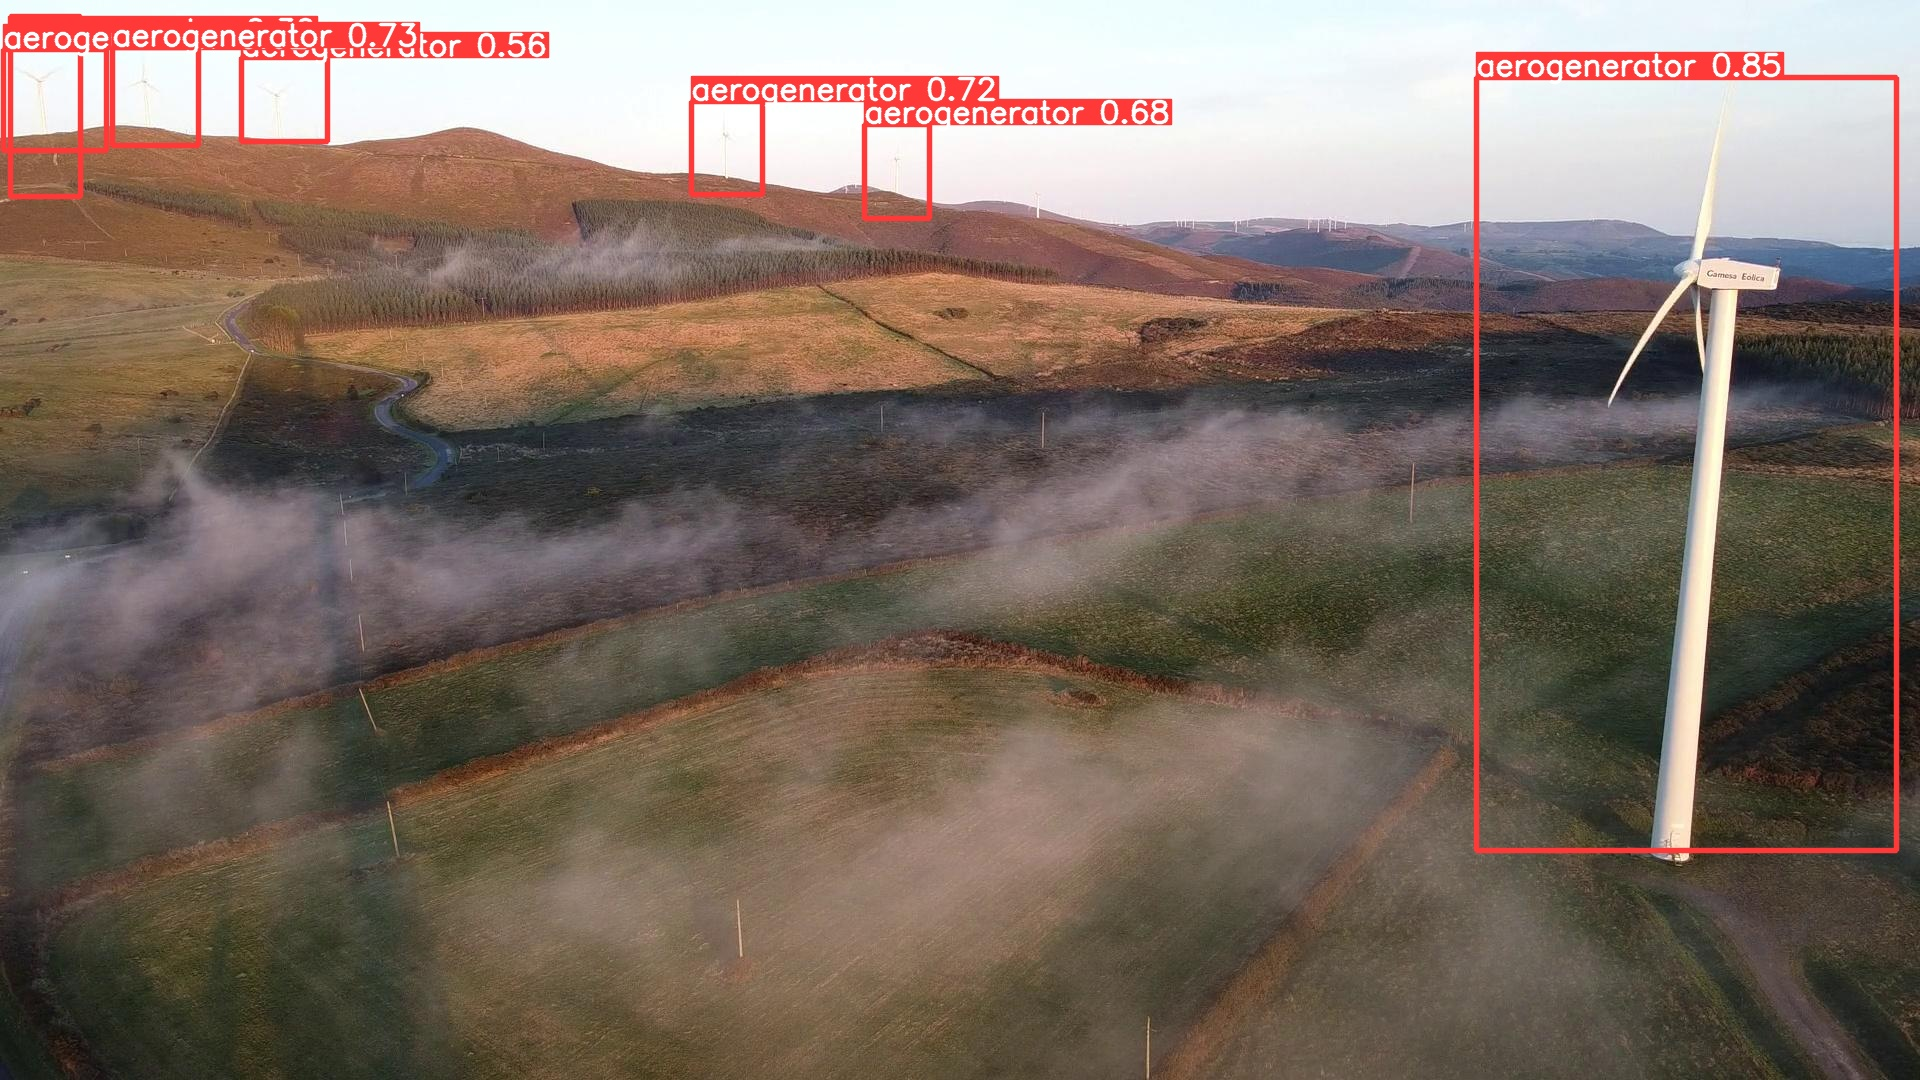

In [ ]:
!python detect.py --weights /content/yolov5/runs/train/exp/weights/best.pt --img 640 --conf 0.25 --source "/content/images_test/windmill97_jpg.rf.c69e938674a305211b1907171023f4f3.jpg"
display.Image(filename='/content/yolov5/runs/detect/exp4/windmill97_jpg.rf.c69e938674a305211b1907171023f4f3.jpg', width=600)

**- Inferencia 5**

detect: weights=['/content/yolov5/runs/train/exp/weights/best.pt'], source=/content/images_test/windmill99_jpg.rf.bb33cb618e097ed6898db05b6dccac20.jpg, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
requirements: /content/requirements.txt not found, check failed.
YOLOv5 🚀 v7.0-147-gaa7c45c Python-3.9.16 torch-2.0.0+cu118 CPU

Fusing layers... 
Model summary: 157 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs
image 1/1 /content/images_test/windmill99_jpg.rf.bb33cb618e097ed6898db05b6dccac20.jpg: 384x640 2 aerogenerators, 229.8ms
Speed: 2.3ms pre-process, 229.8ms inference, 1.2ms NMS per image at shape (1, 3, 640, 640)
Results saved to runs/

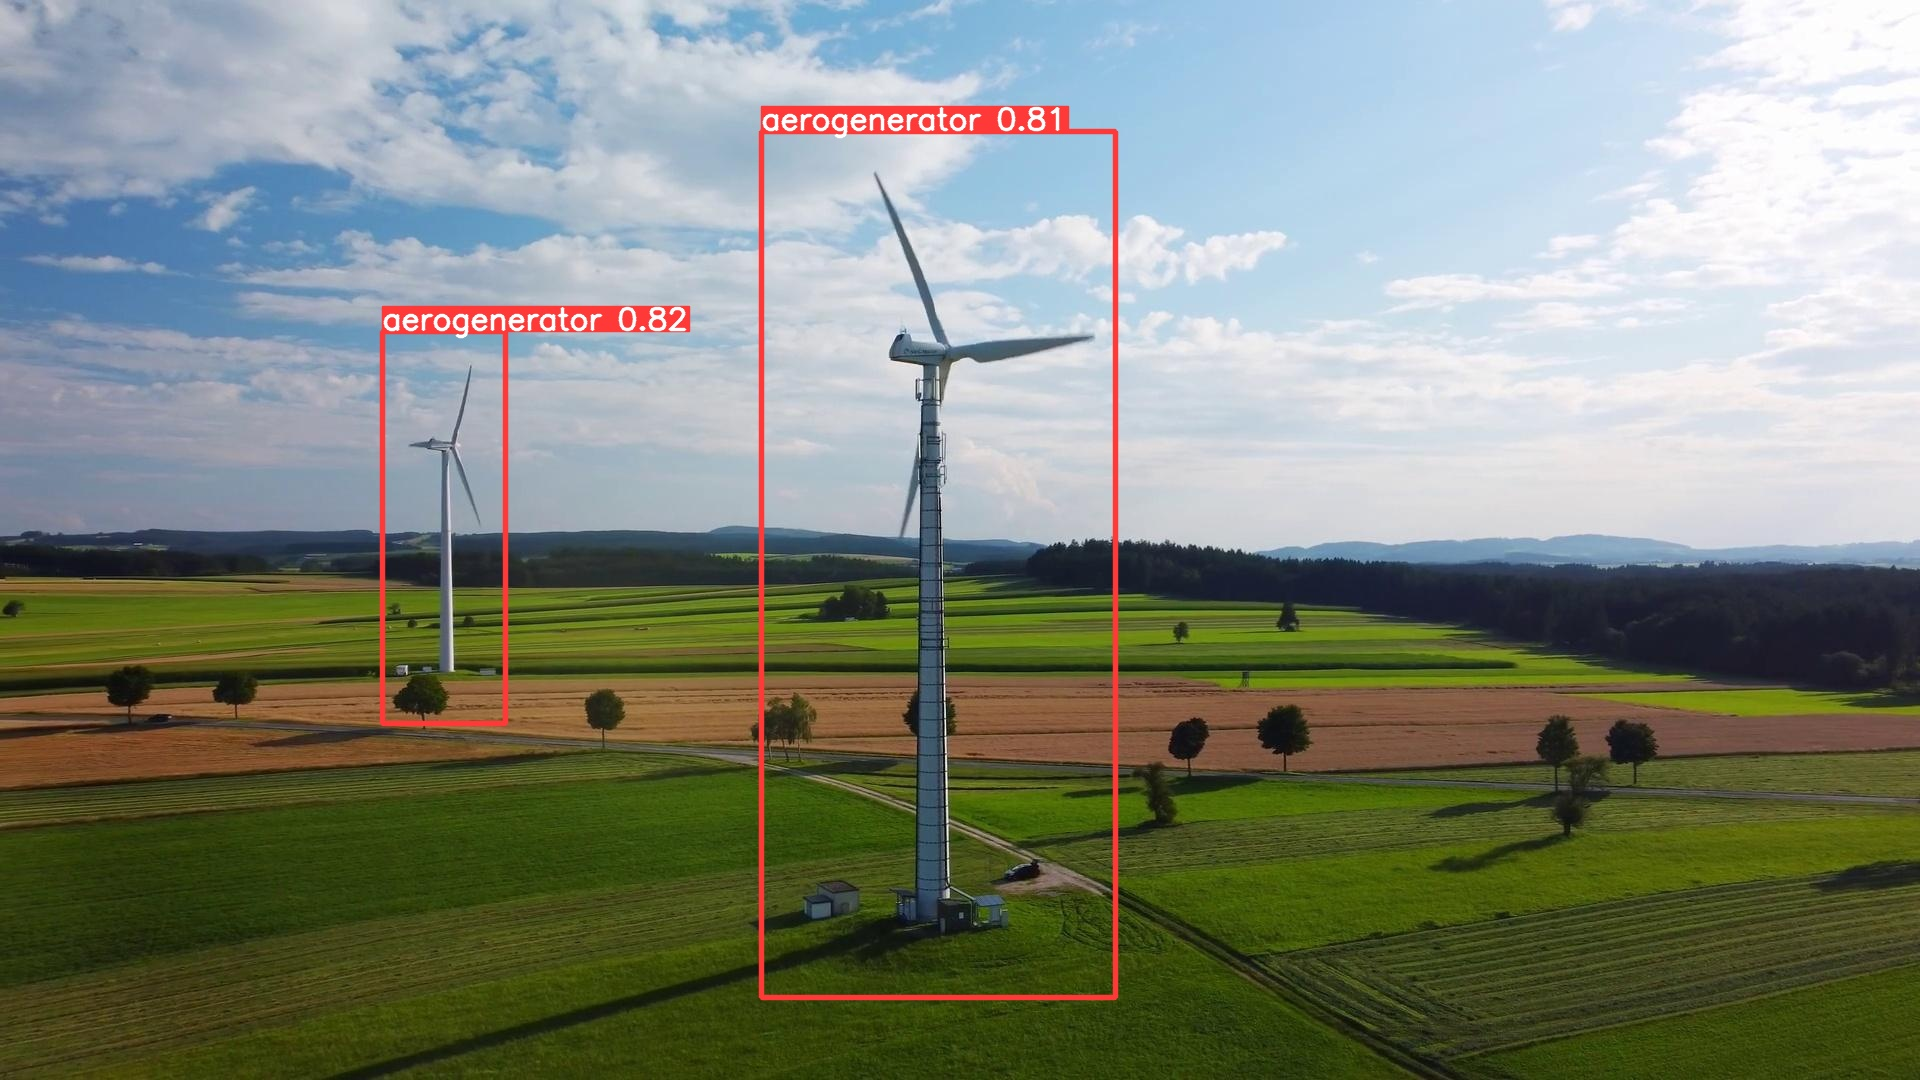

In [ ]:
!python detect.py --weights /content/yolov5/runs/train/exp/weights/best.pt --img 640 --conf 0.25 --source "/content/images_test/windmill99_jpg.rf.bb33cb618e097ed6898db05b6dccac20.jpg"
display.Image(filename='/content/yolov5/runs/detect/exp5/windmill99_jpg.rf.bb33cb618e097ed6898db05b6dccac20.jpg', width=600)

En conclusión de este apartado, podemos una muy buena precisión a la hora de delimitar los cuadros en donde se encuentran los aerogeneradores, vemos tambien una buena confianza en estas delimitaciones, teniendo mas de 80% de confianza para la mayoria de los recuadros

Esta gran precisión la podemos destacar en las inferencias #3 y #4, donde podemos observar que es capaz de detectar los aerogeneradores a una gran distancia, distancia que incluso para el ojo humano puede ser un poco dificil de identificar